In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.dates import (YEARLY, DateFormatter,
                              rrulewrapper, RRuleLocator, drange)
import datetime   # package that helps manipulate dates
import matplotlib.dates as mdates
import calendar

from dateutil.parser import parse     # package for date parsing




In [2]:
qzu_df = pd.read_csv('data/aqicn/quanzhou.csv')

In [3]:
def change_df (df):
    data = df.copy()
    data.date = pd.to_datetime(data.date)
    data = data.sort_values(by ='date', ascending= False)

    data.columns = ['date','PM25','PM10','O3','NO2','SO2','CO']

    for col in data.columns:
        if col != 'date':
            data[col] = pd.to_numeric(data[col], errors ='coerce')
    data = data.dropna()
    data = data.sort_values('date', ascending =False)
    return data

qzu_df = change_df(qzu_df)

In [4]:
qzu_df ['NO2/SO2'] = qzu_df['NO2']/qzu_df['SO2']

In [5]:
from utils import plot_df, air_pairplot, air_cormatrix, monthlyAverage, df_ratio

In [6]:
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})  # increase dots per inch ...

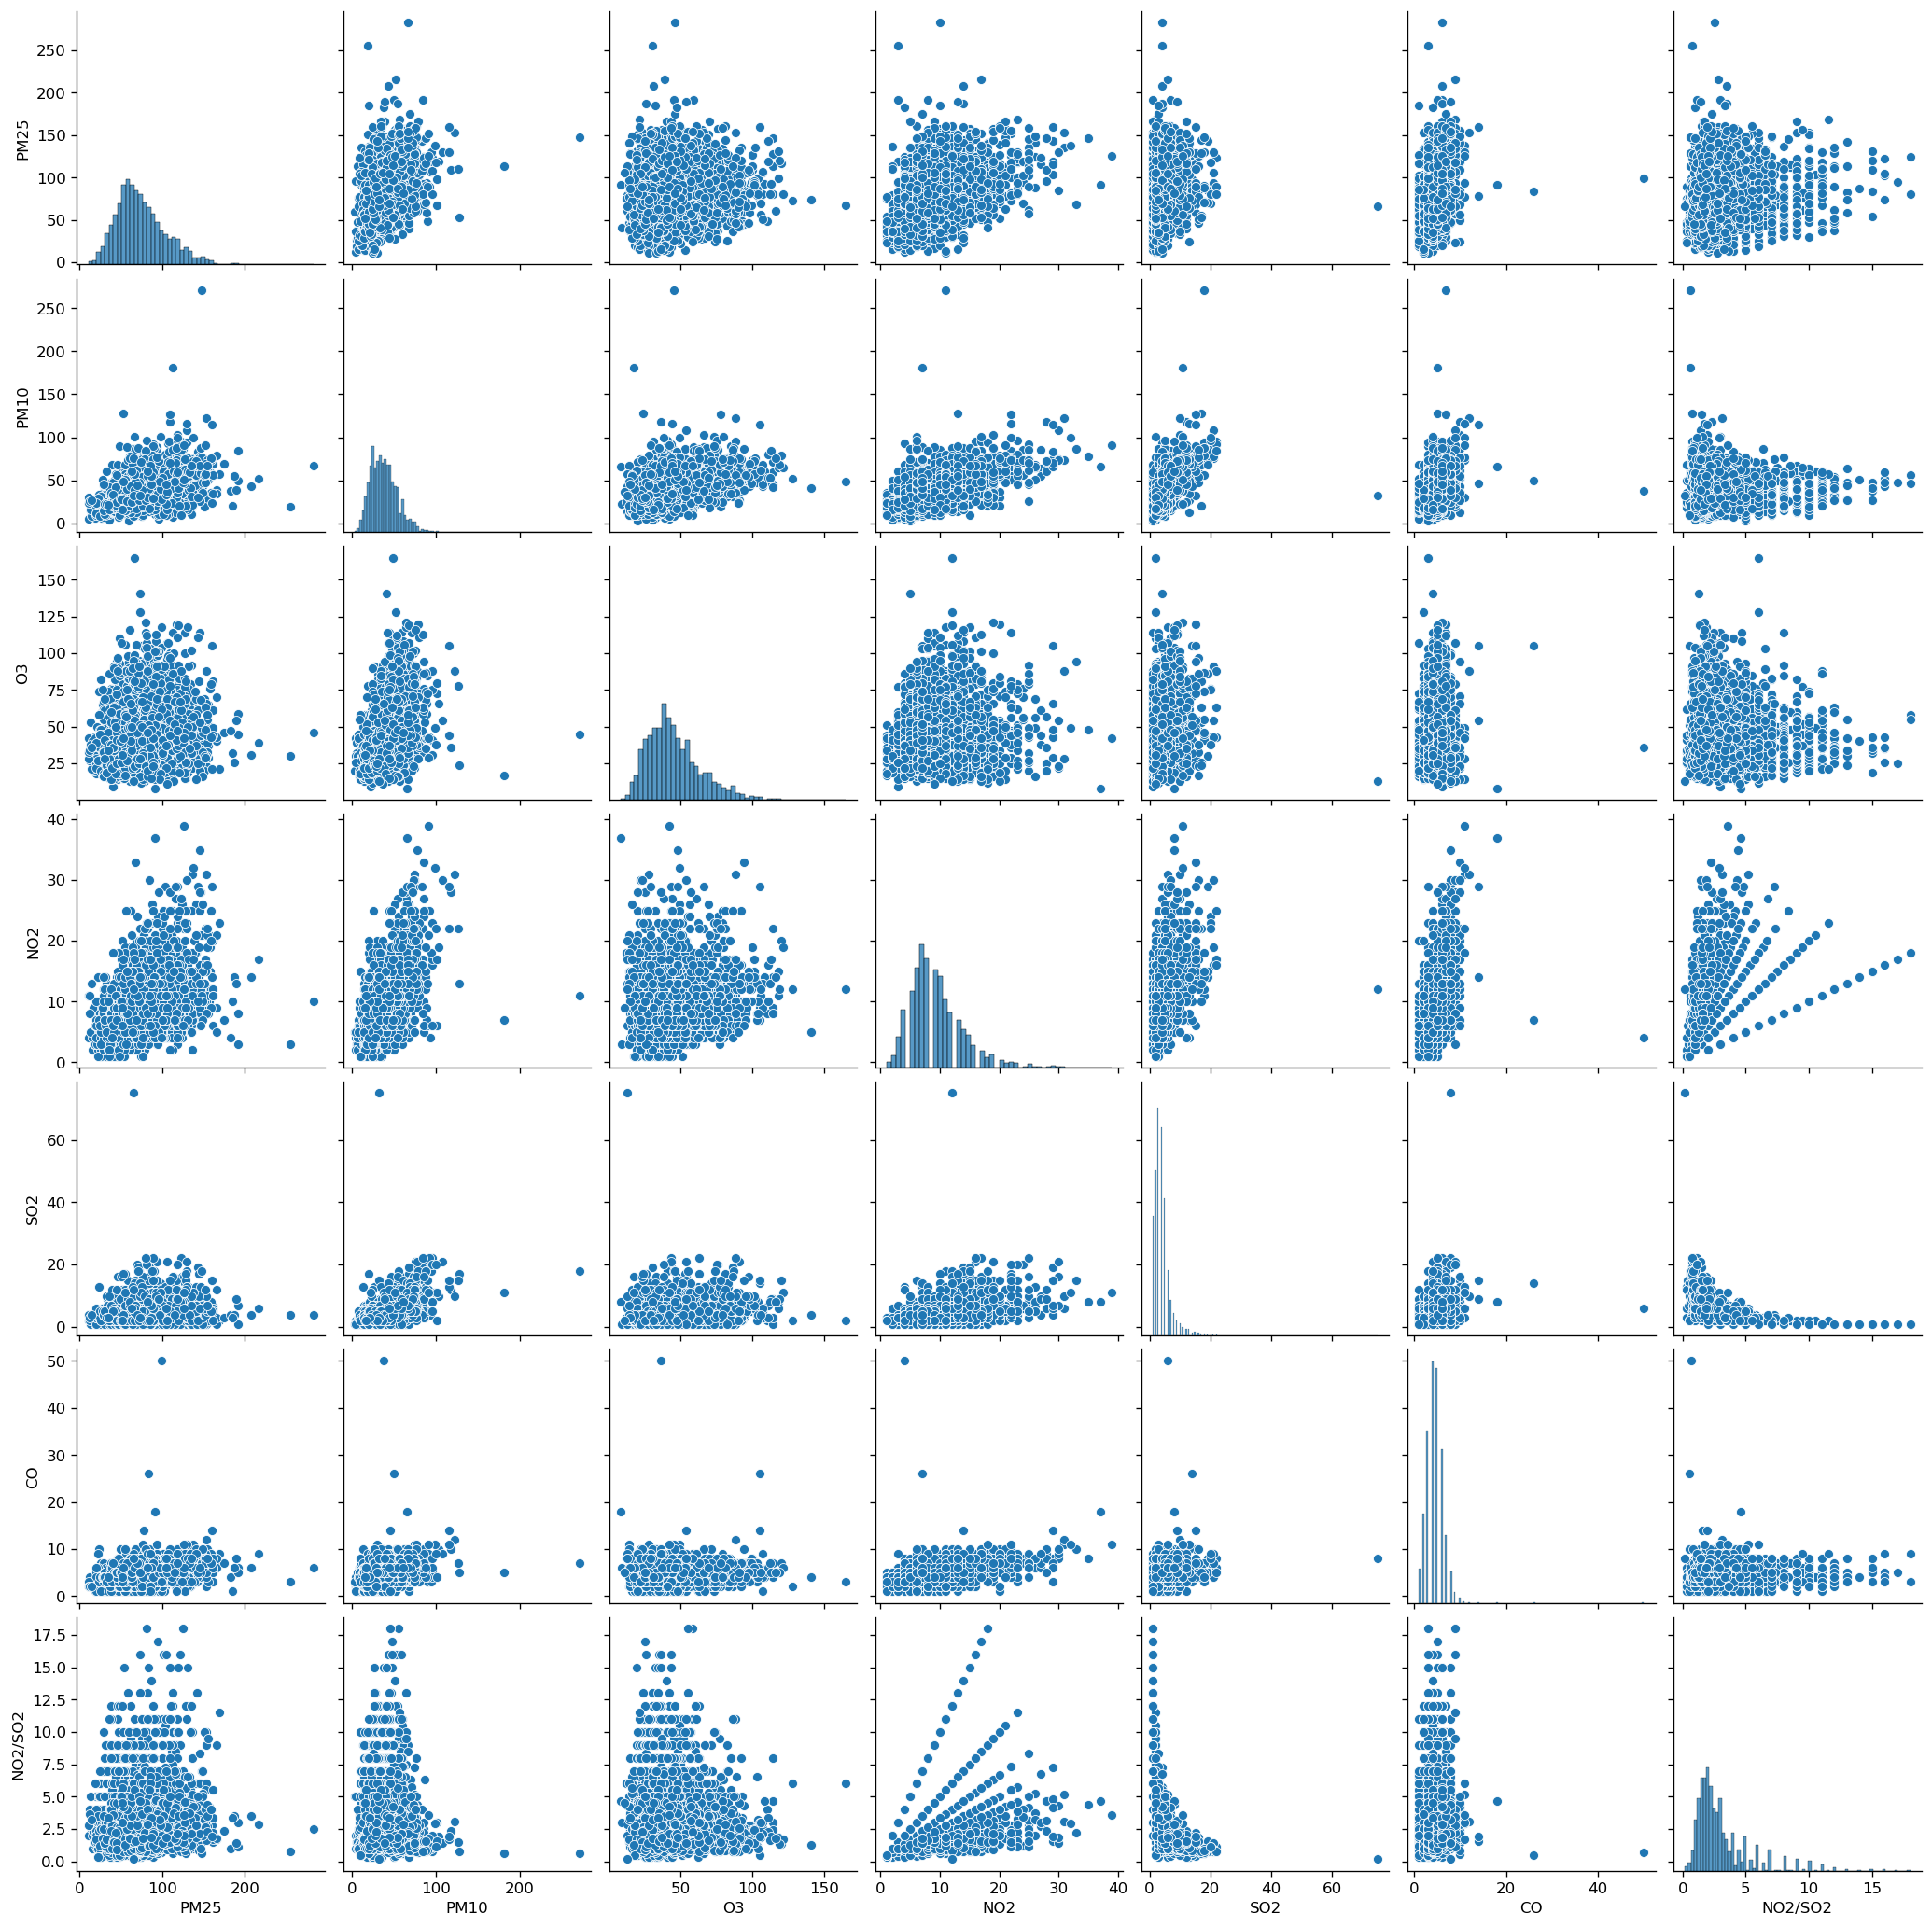

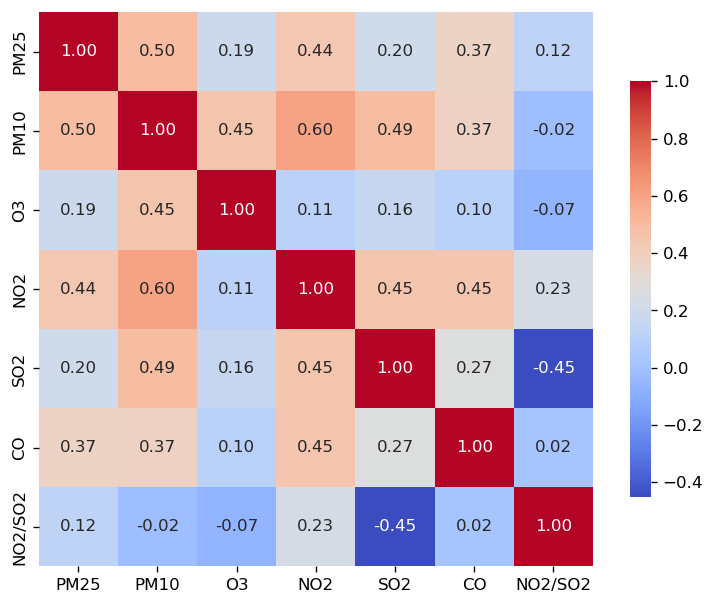

In [7]:
air_pairplot(qzu_df)
air_cormatrix(qzu_df)

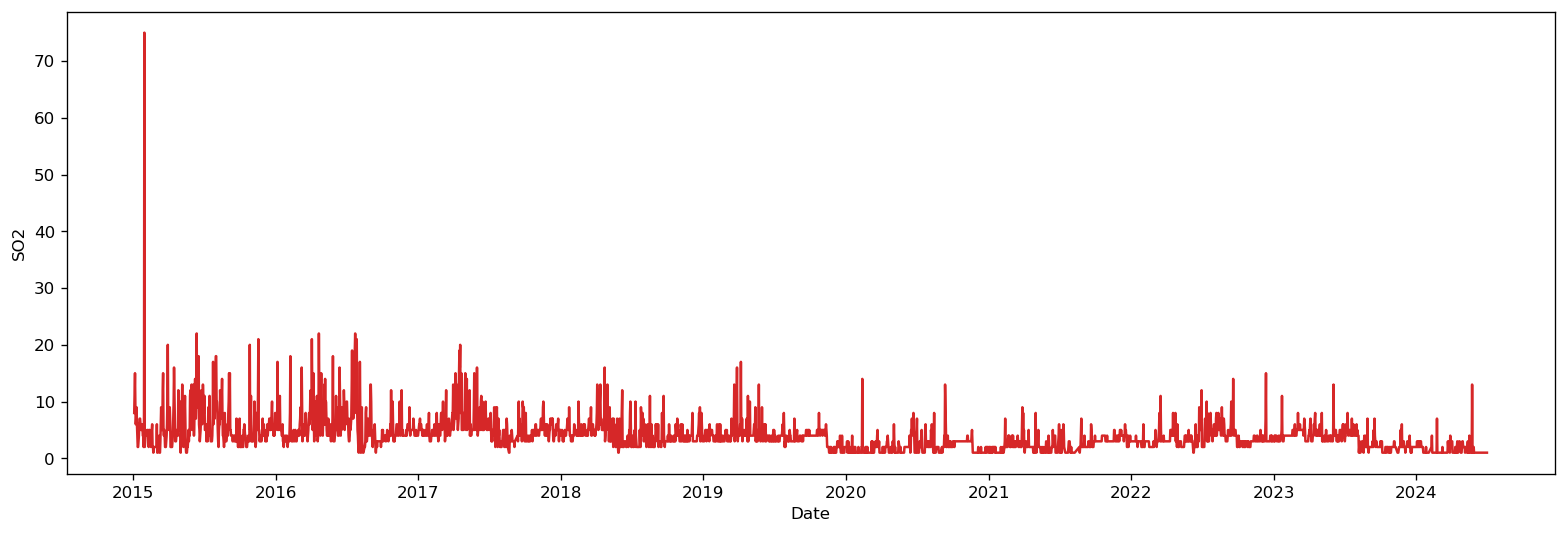

In [8]:
plot_df(qzu_df, qzu_df.date, qzu_df.SO2, xlabel ='Date', ylabel ='SO2')

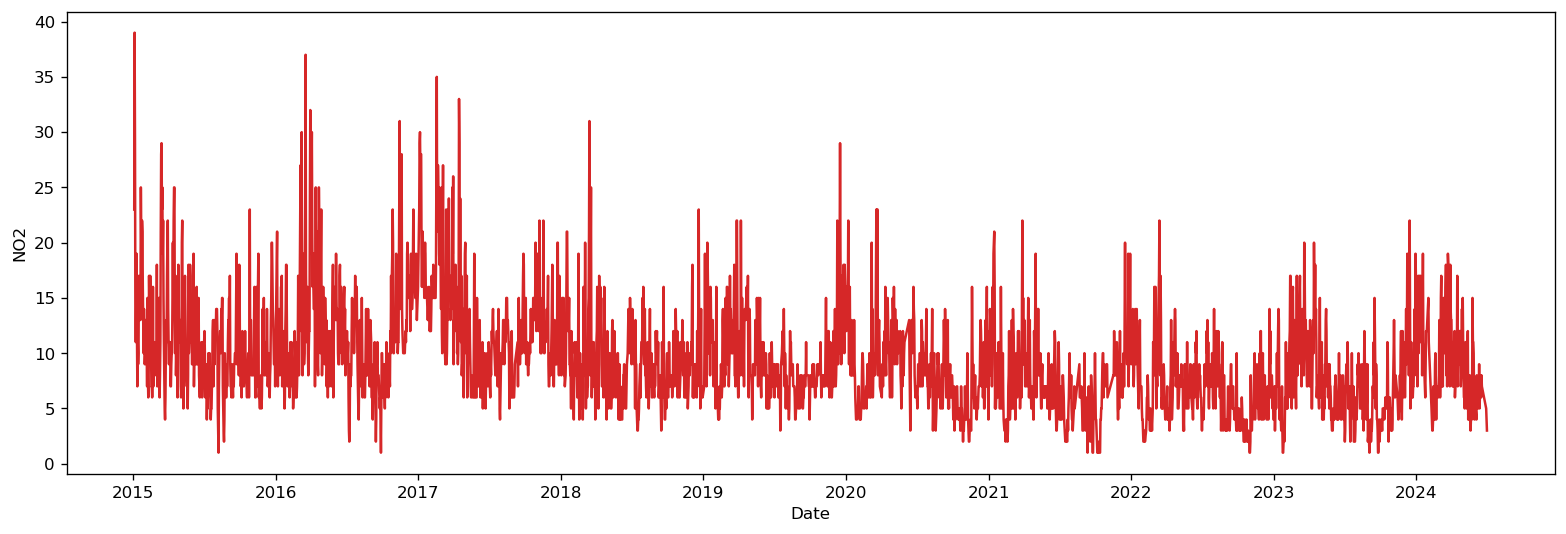

In [9]:
plot_df(qzu_df, qzu_df.date, qzu_df.NO2, xlabel ='Date', ylabel ='NO2')

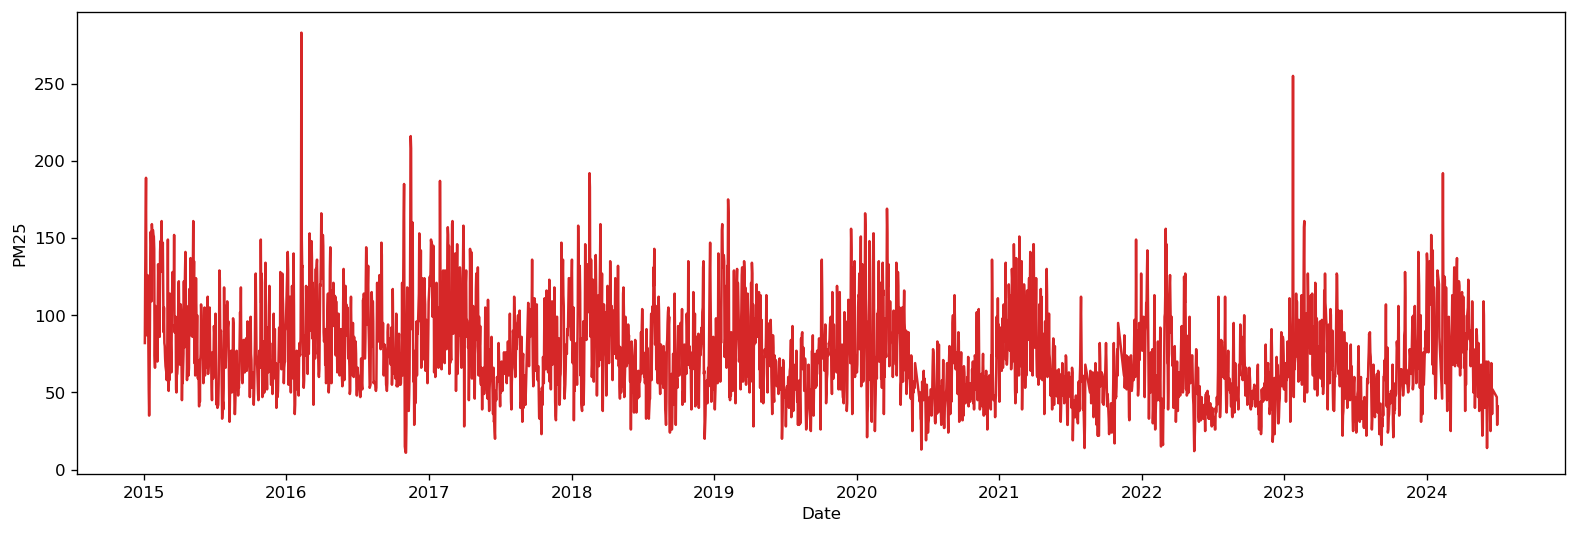

In [10]:
plot_df(qzu_df, qzu_df.date, qzu_df.PM25, xlabel ='Date', ylabel ='PM25')

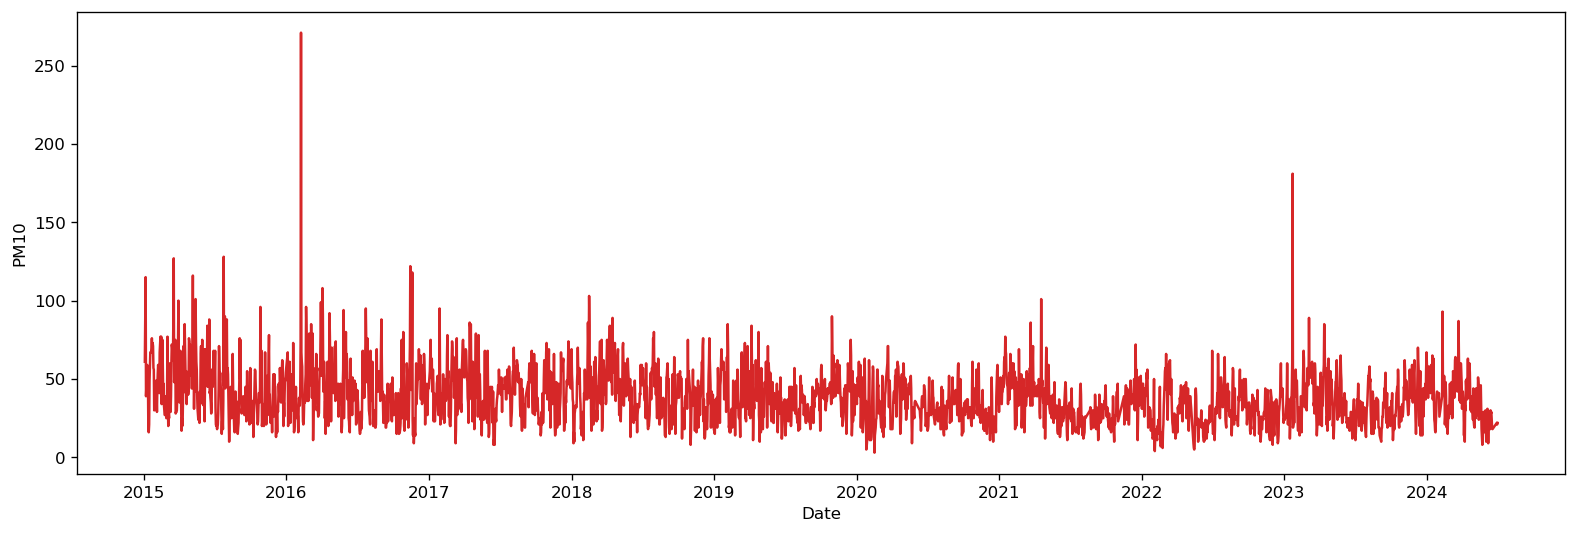

In [11]:
plot_df(qzu_df, qzu_df.date, qzu_df.PM10, xlabel ='Date', ylabel ='PM10')

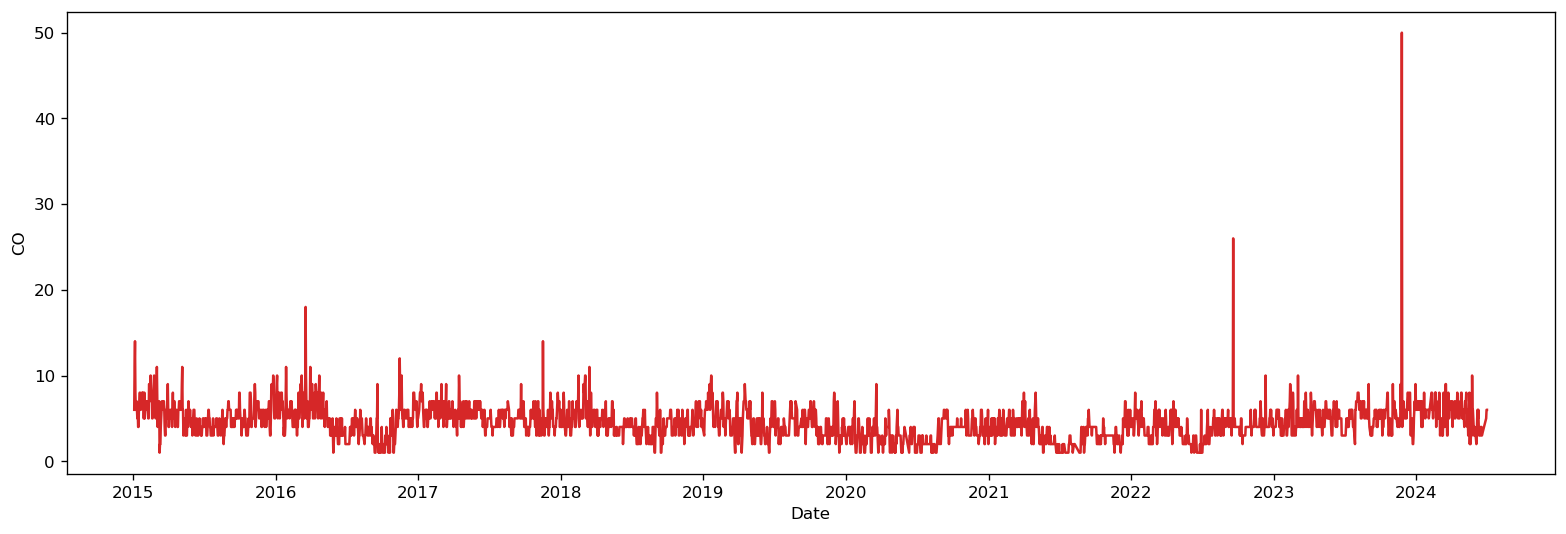

In [12]:
plot_df(qzu_df, qzu_df.date, qzu_df.CO, xlabel ='Date', ylabel ='CO')

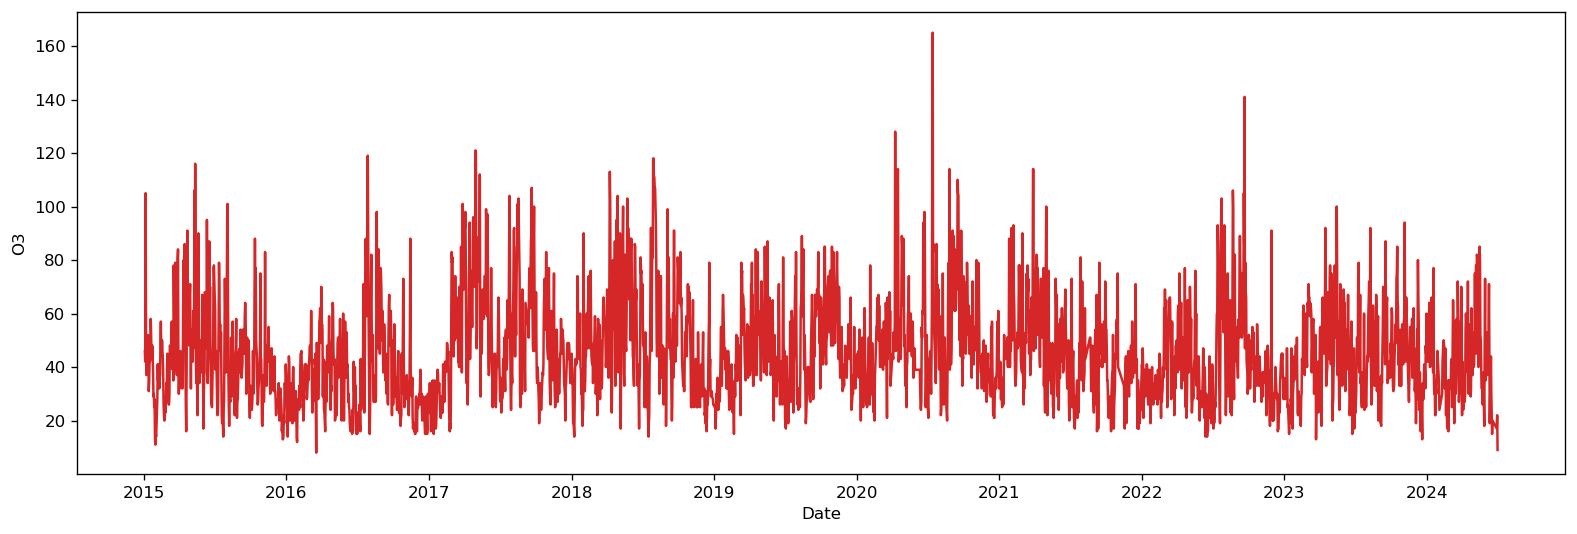

In [13]:
plot_df(qzu_df, qzu_df.date, qzu_df.O3, xlabel ='Date', ylabel ='O3')

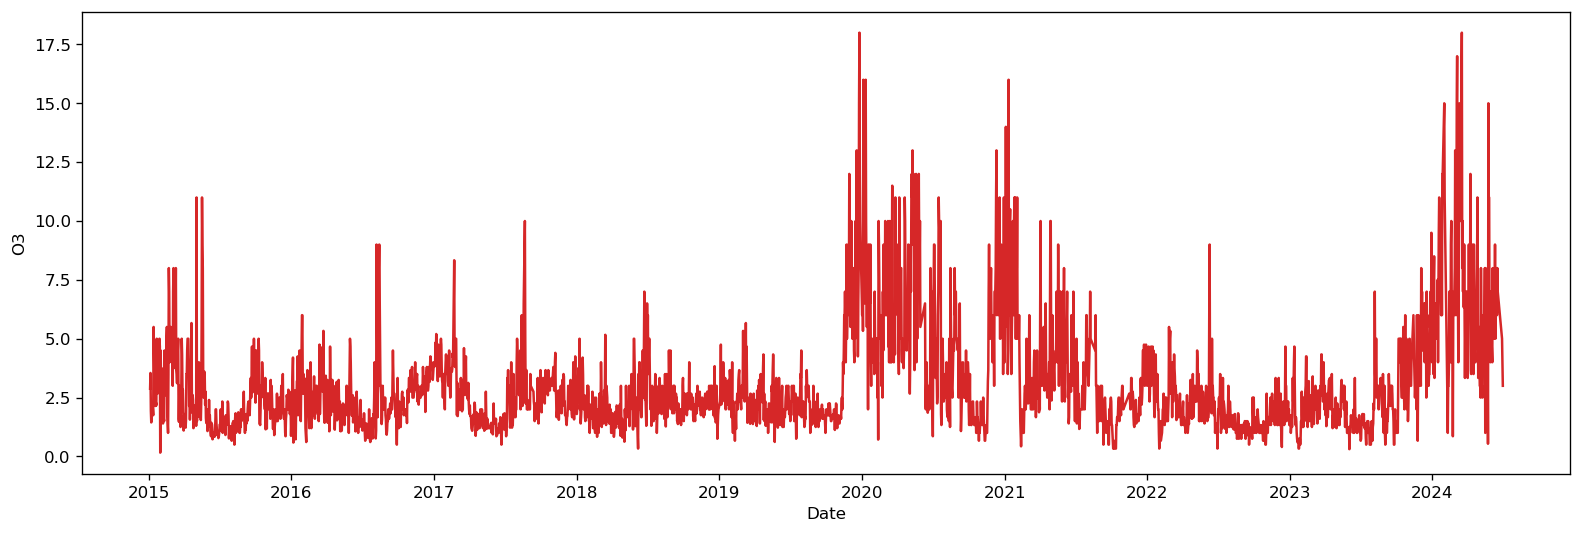

In [14]:
plot_df(qzu_df, qzu_df.date, qzu_df.NO2/qzu_df.SO2, xlabel ='Date', ylabel ='O3')

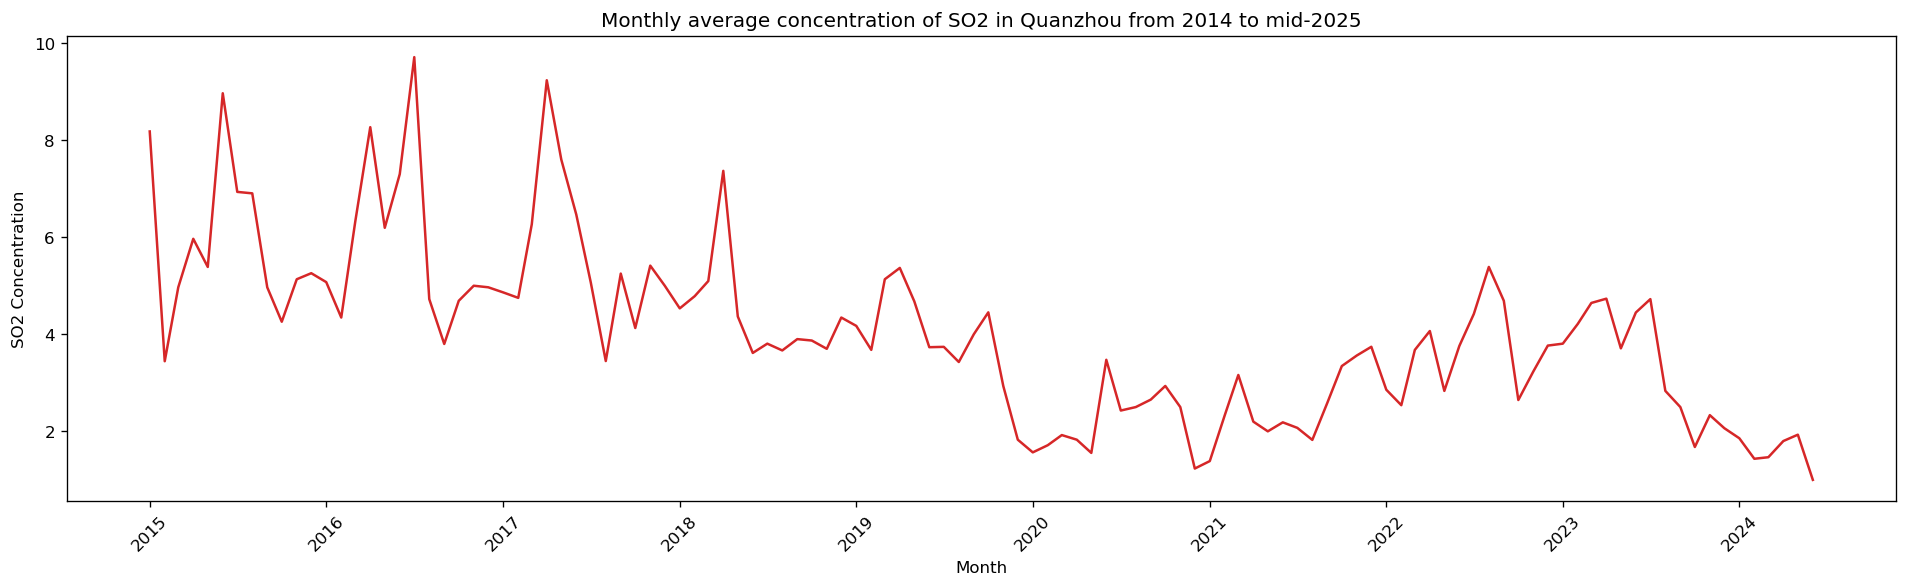

In [15]:
monthlyAverage(qzu_df, 'Quanzhou','SO2')

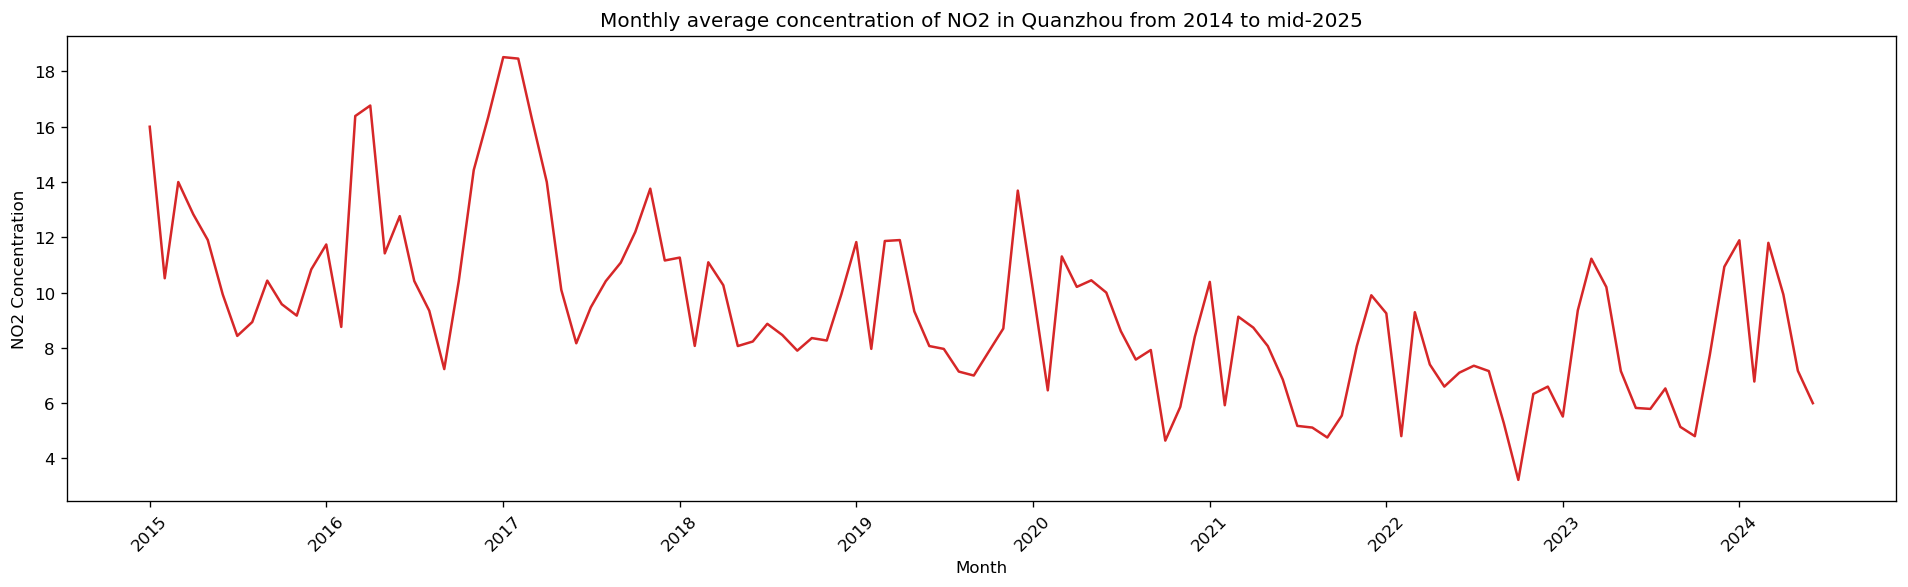

In [16]:
monthlyAverage(qzu_df, 'Quanzhou','NO2')

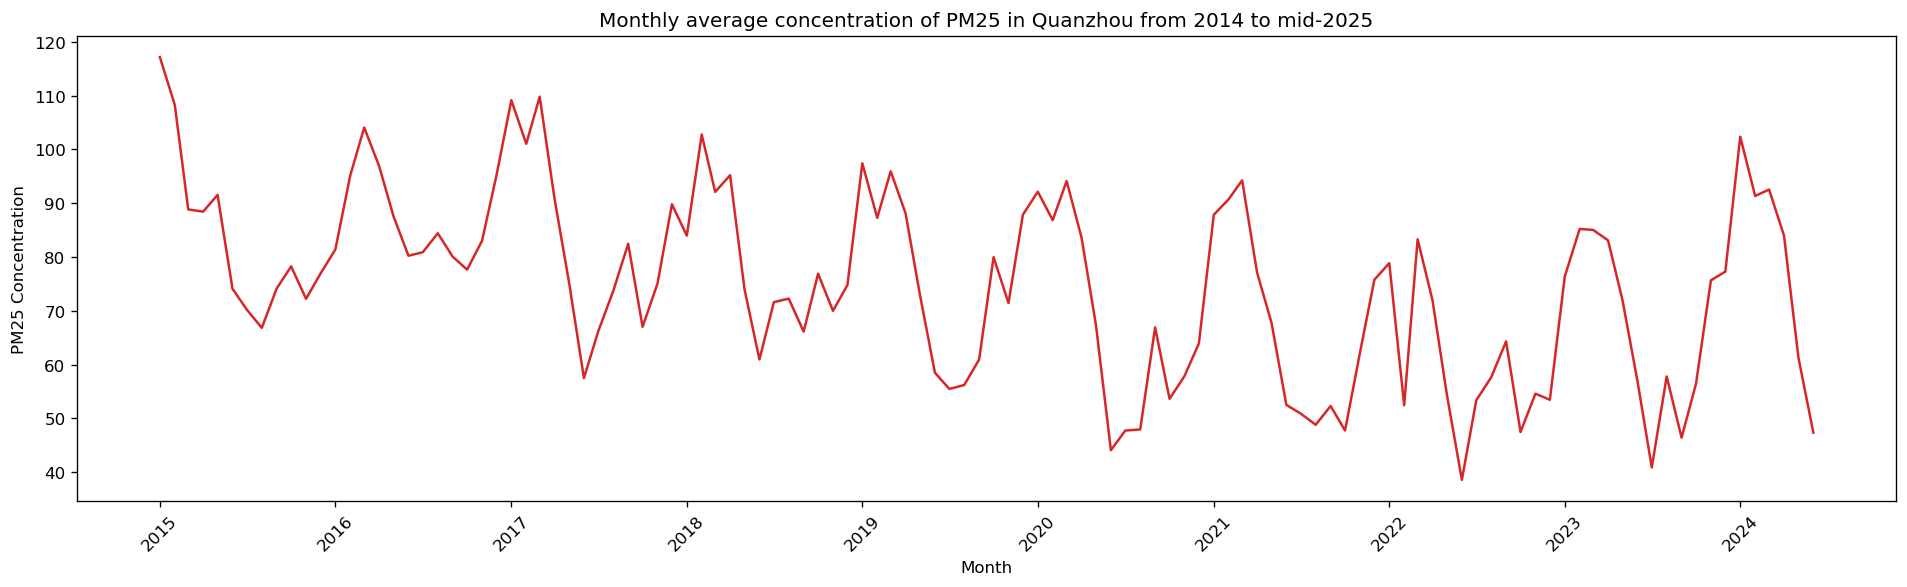

In [17]:
monthlyAverage(qzu_df, 'Quanzhou','PM25')

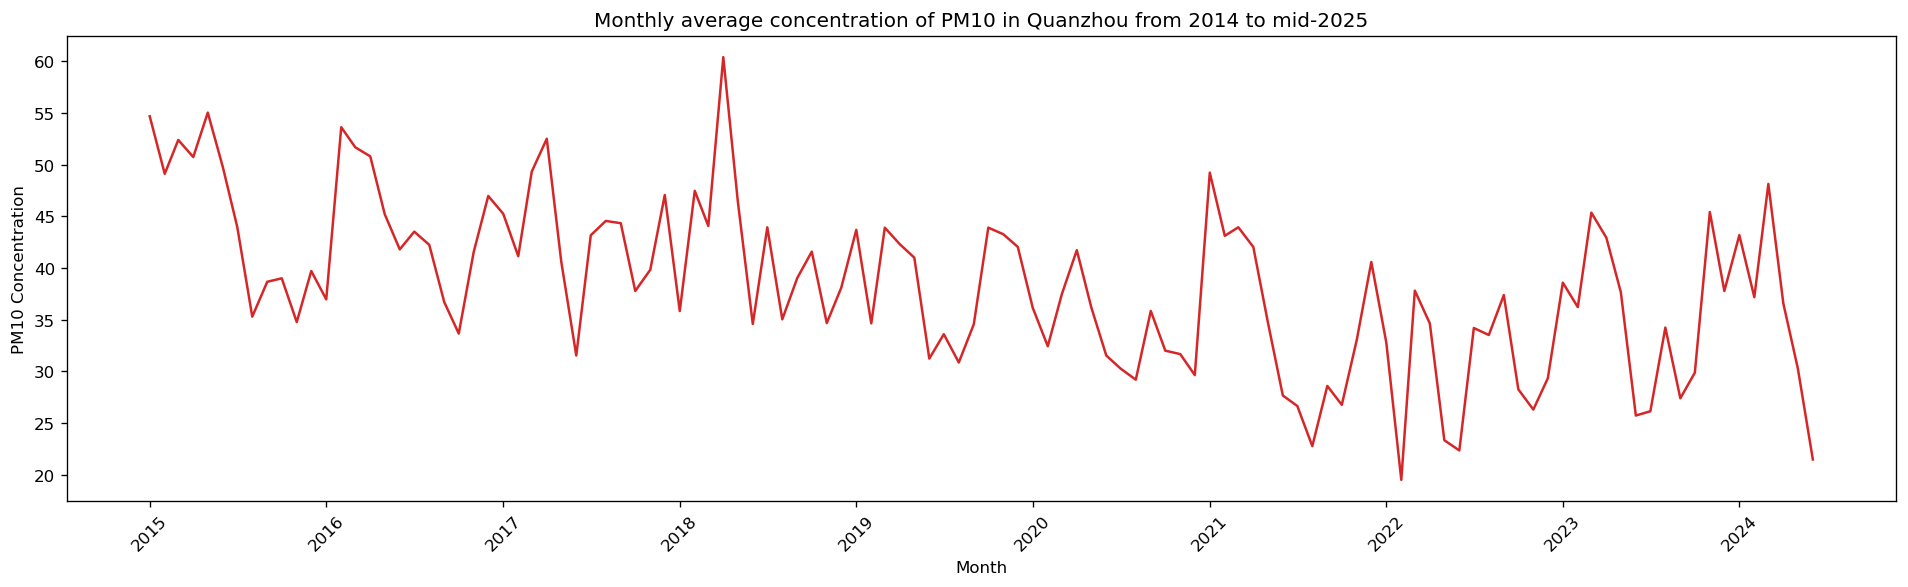

In [18]:
monthlyAverage(qzu_df, 'Quanzhou','PM10')

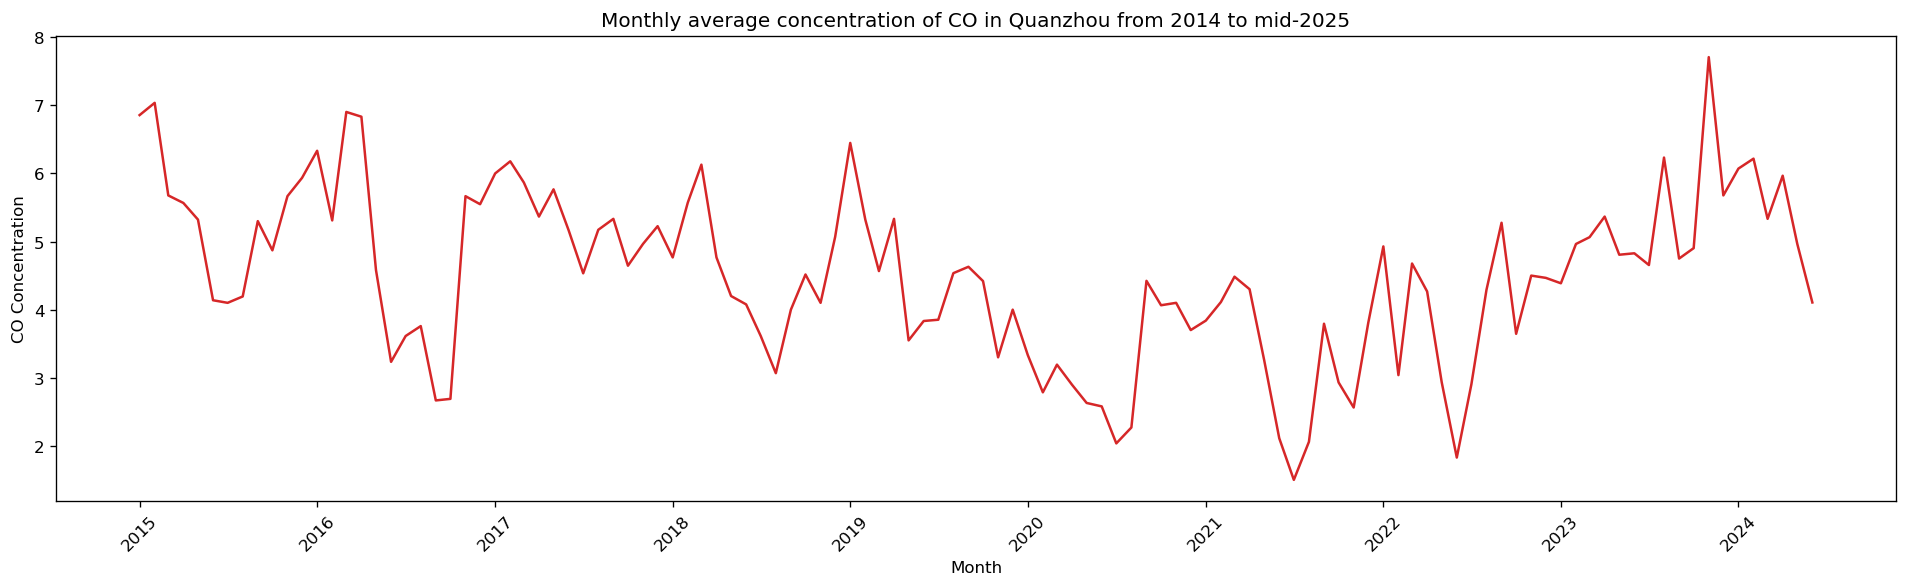

In [19]:
monthlyAverage(qzu_df, 'Quanzhou','CO')

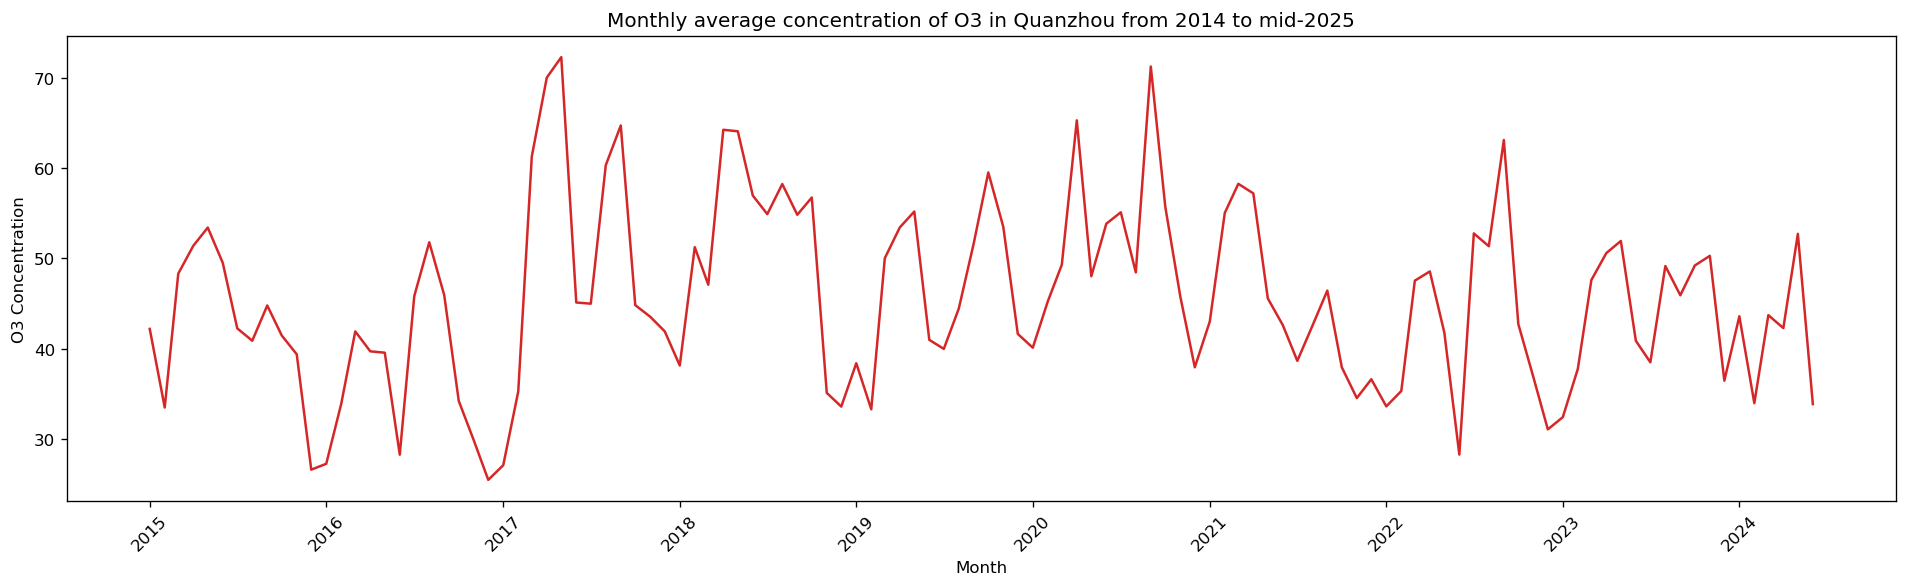

In [20]:
monthlyAverage(qzu_df, 'Quanzhou','O3')

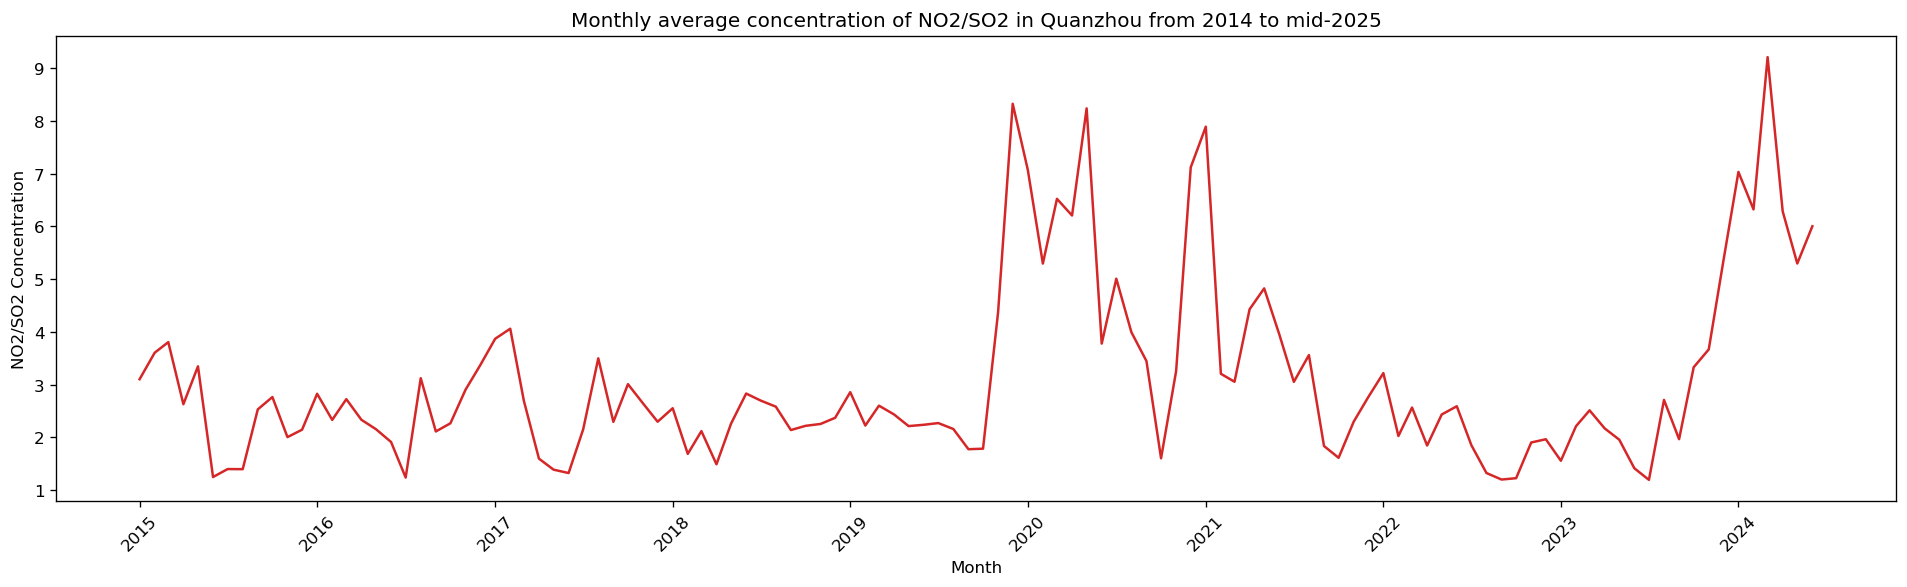

In [21]:
monthlyAverage(qzu_df, 'Quanzhou','NO2/SO2')

# Considering the change of pollutants.

Let $P_t$ denote the value of air pollutant $P$ on day $t$, and $P_{t-1}$ the value on onday prior. To quantify day-to-day changes and capture the seasonal patterns, we consider the following expression:
$$
\log \frac{P_t}{P_{t-1}}
$$
This quantity allows us to measure how pollutant levels fluctuate over time and analyze the distribution of these changes.

Furthermore, to capture broader trends, we compute the cumulative sum of these daily changes.

In [22]:
df_ratio(qzu_df)
qzu_df_ratio = df_ratio(qzu_df).drop(columns=['NO2/SO2'])
qzu_df_ratio

date  PM25_ratio  PM10_ratio  O3_ratio  NO2_ratio  SO2_ratio  \
461  2024-06-29   -0.346276   -0.046520  0.893818   0.287682   0.000000   
460  2024-06-28    0.482852    0.046520 -0.257829   0.223144   0.000000   
449  2024-06-17    0.101096   -0.200671  0.162519   0.336472   0.000000   
448  2024-06-16   -0.367725    0.054067 -0.287682   0.133531   0.000000   
447  2024-06-15    0.423814    0.233615  0.427444  -0.287682   0.000000   
...         ...         ...         ...       ...        ...        ...   
3720 2015-01-08    0.188052   -0.200671 -0.260283  -0.167054  -0.154151   
3719 2015-01-07    0.587787   -0.143101  0.378066   0.167054   0.405465   
3718 2015-01-06   -0.166573    1.081370  0.664976   0.802346   0.510826   
3717 2015-01-05   -0.238892   -0.234073 -0.916291   0.296266  -0.310155   
3716 2015-01-04   -0.429563   -0.399986  0.090972  -0.528067  -0.318454   

      CO_ratio  
461   0.000000  
460  -0.182322  
449  -0.510826  
448   0.287682  
447   0.000000  
...        ...  
3720  0.000000  
3719  0.287682  
3718  0.559616  
3717 -0.241162  
3716 -0.606136  

[3298 rows x 7 columns]

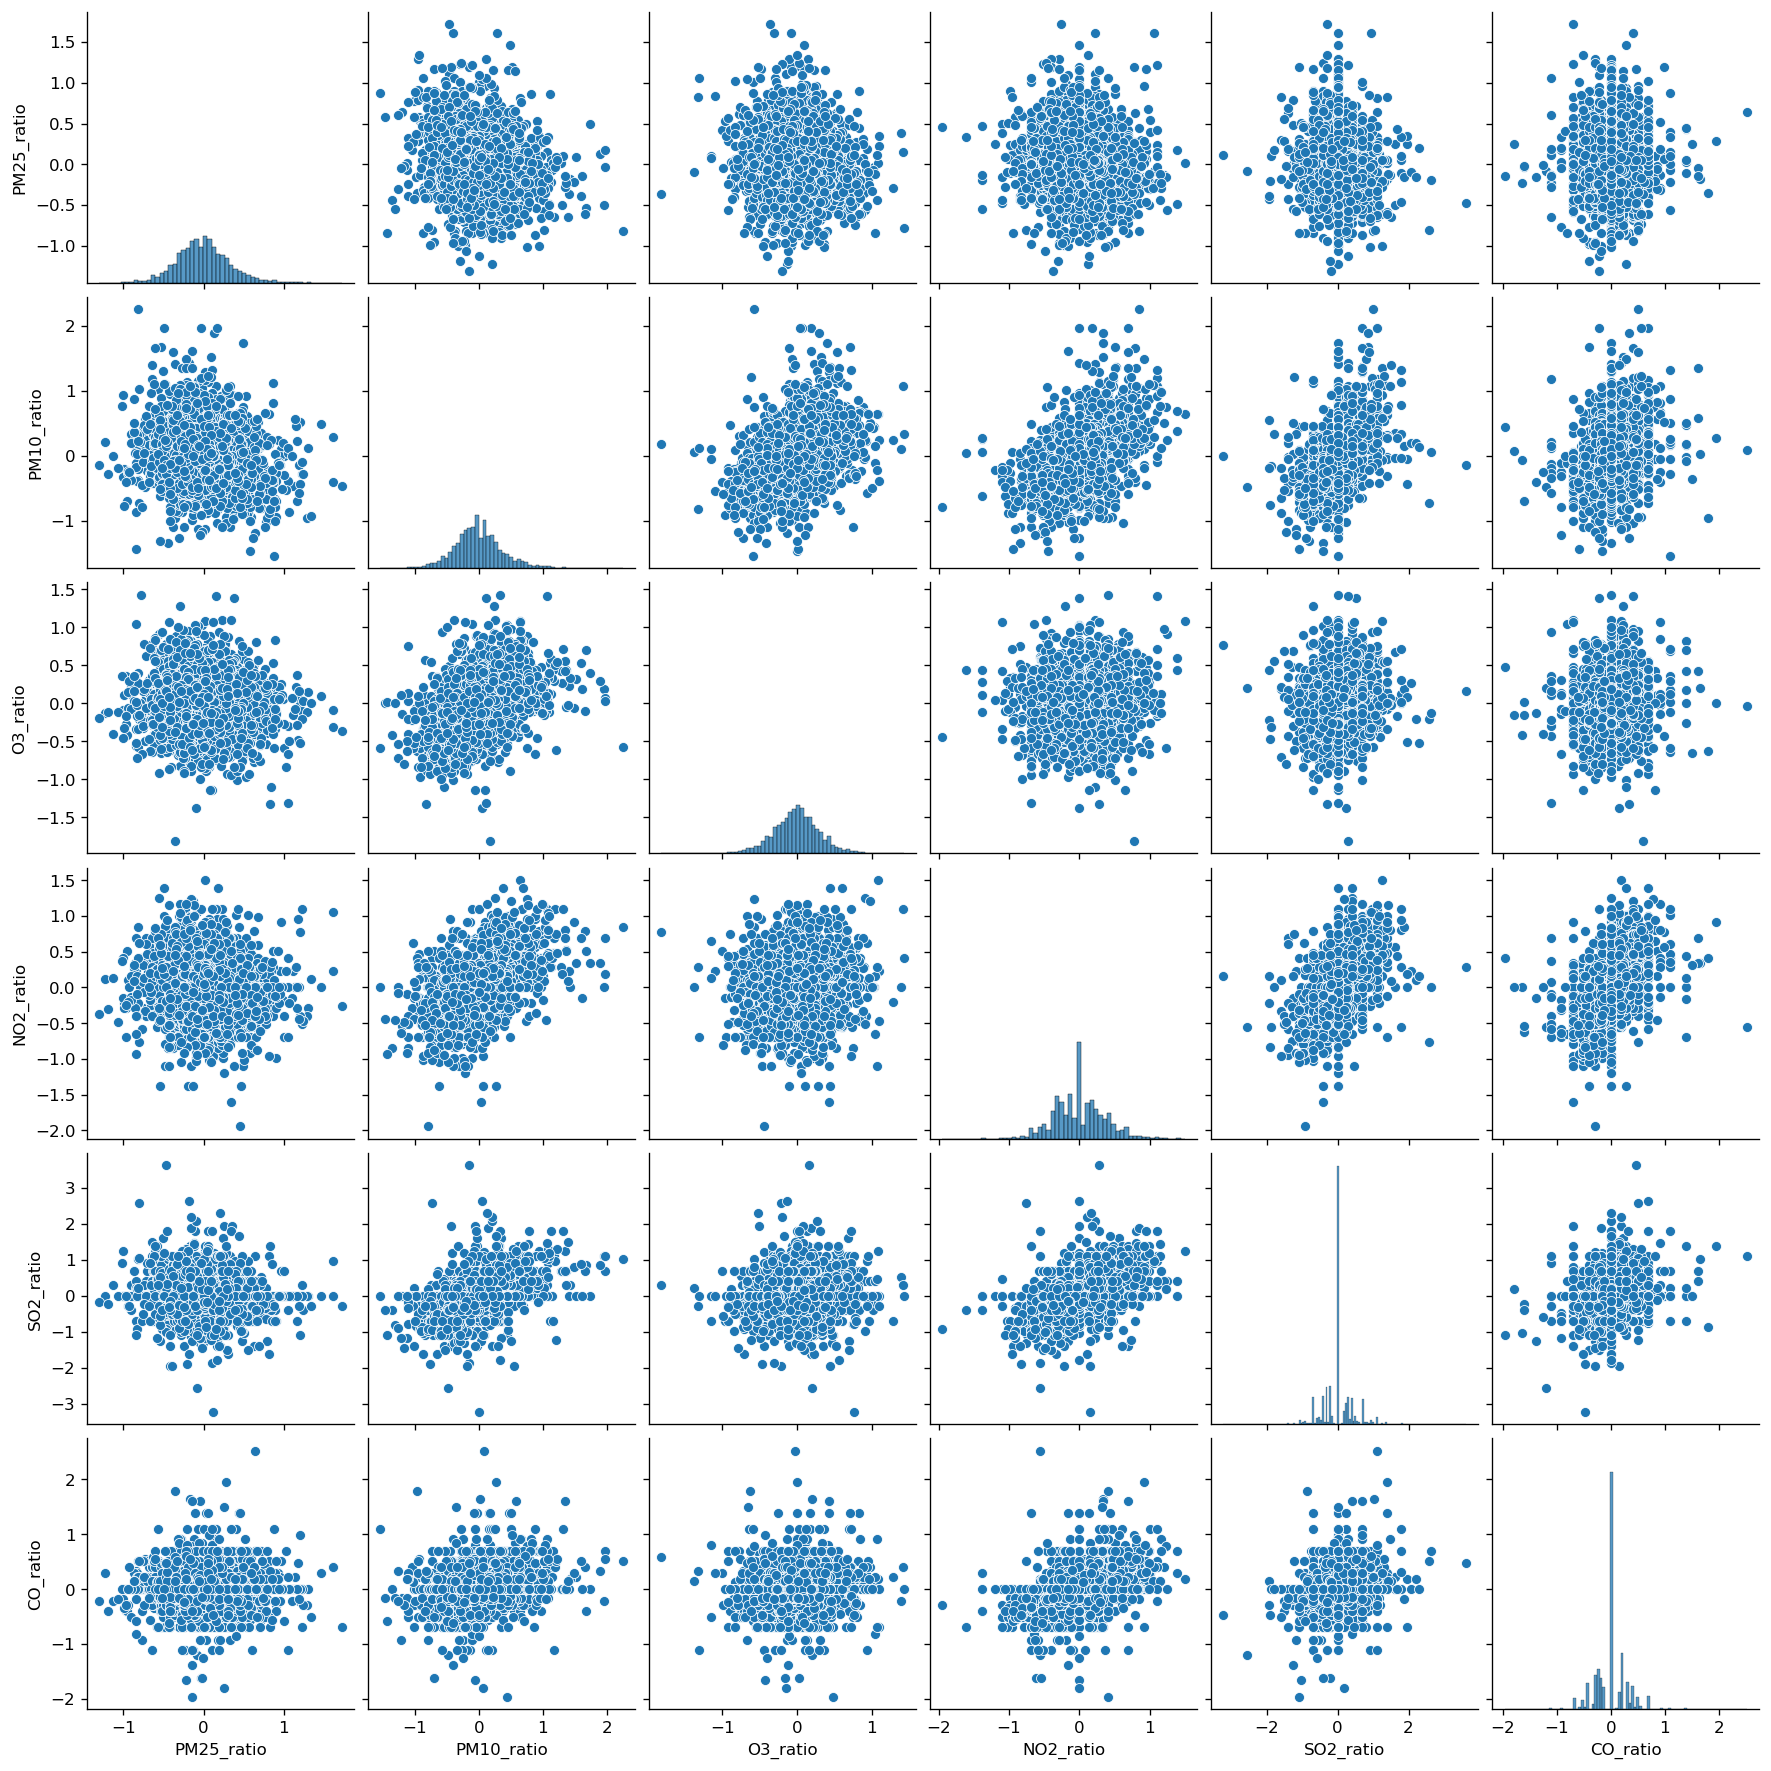

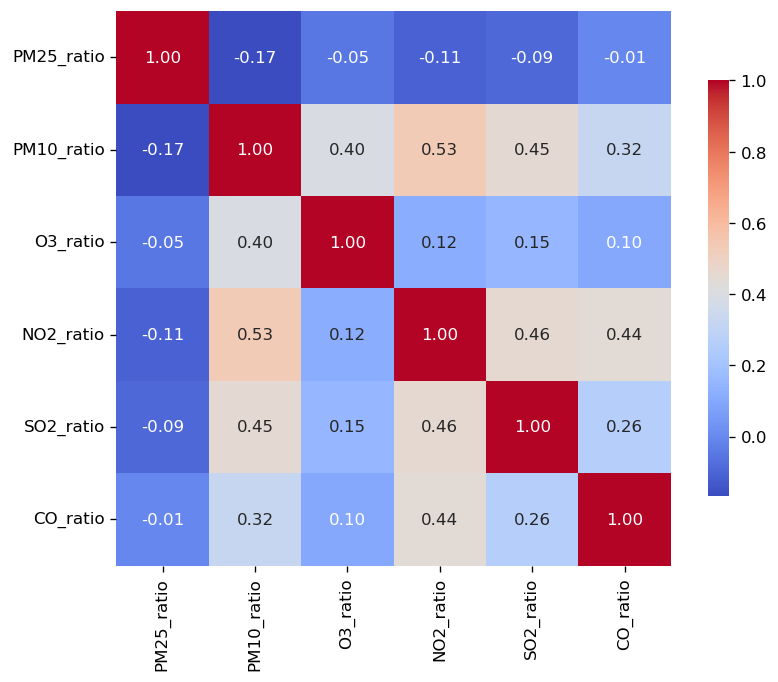

In [23]:
air_pairplot (qzu_df_ratio)
air_cormatrix(qzu_df_ratio)

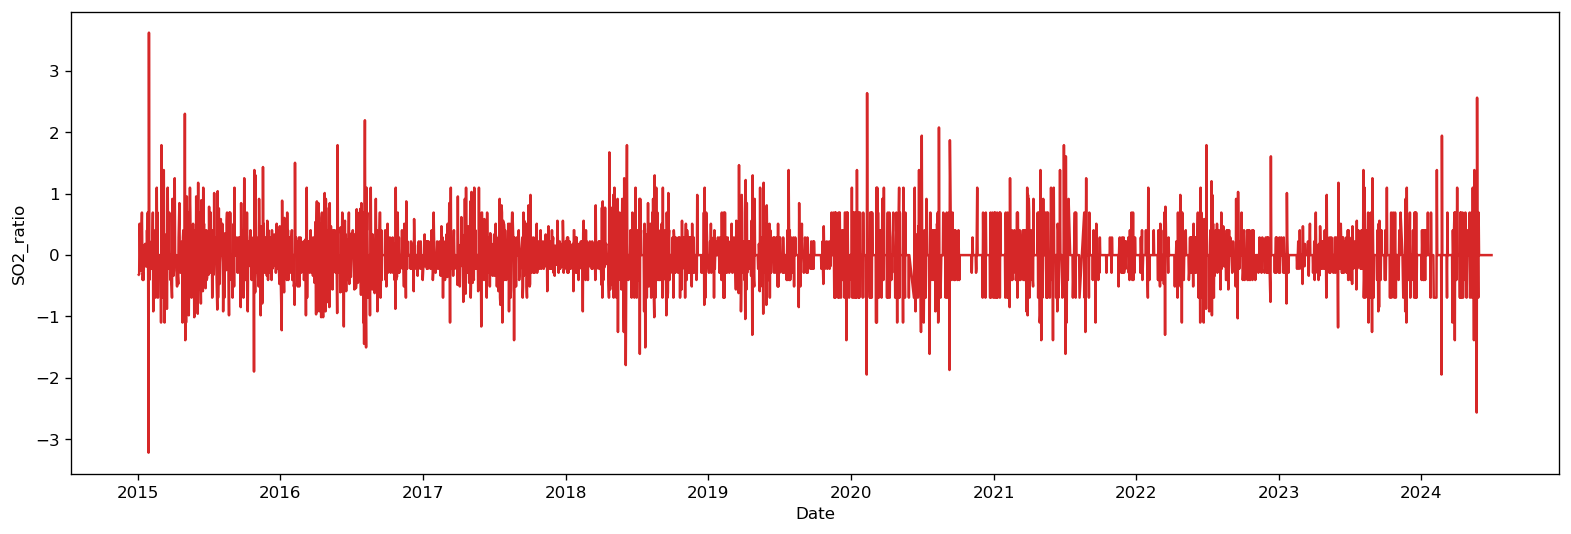

In [24]:
plot_df(qzu_df_ratio, qzu_df_ratio.date, qzu_df_ratio.SO2_ratio, xlabel ='Date', ylabel ='SO2_ratio')

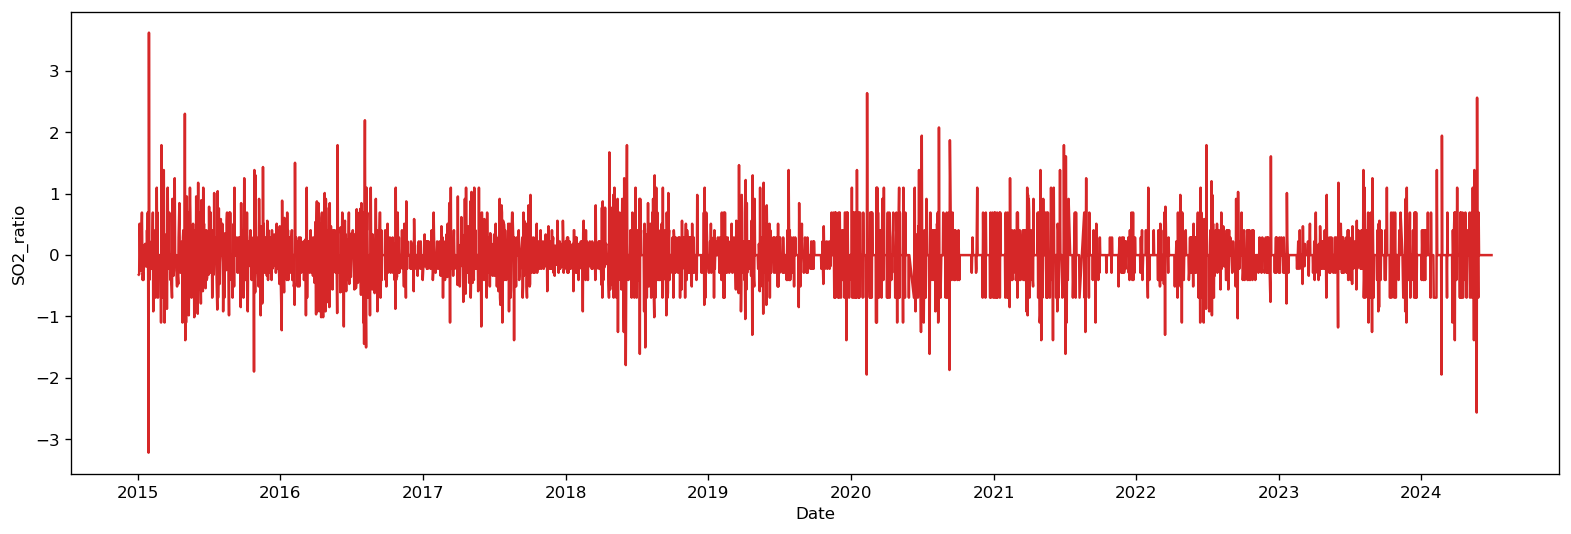

In [25]:
plot_df(qzu_df_ratio, qzu_df_ratio.date, qzu_df_ratio.SO2_ratio, xlabel ='Date', ylabel ='SO2_ratio')

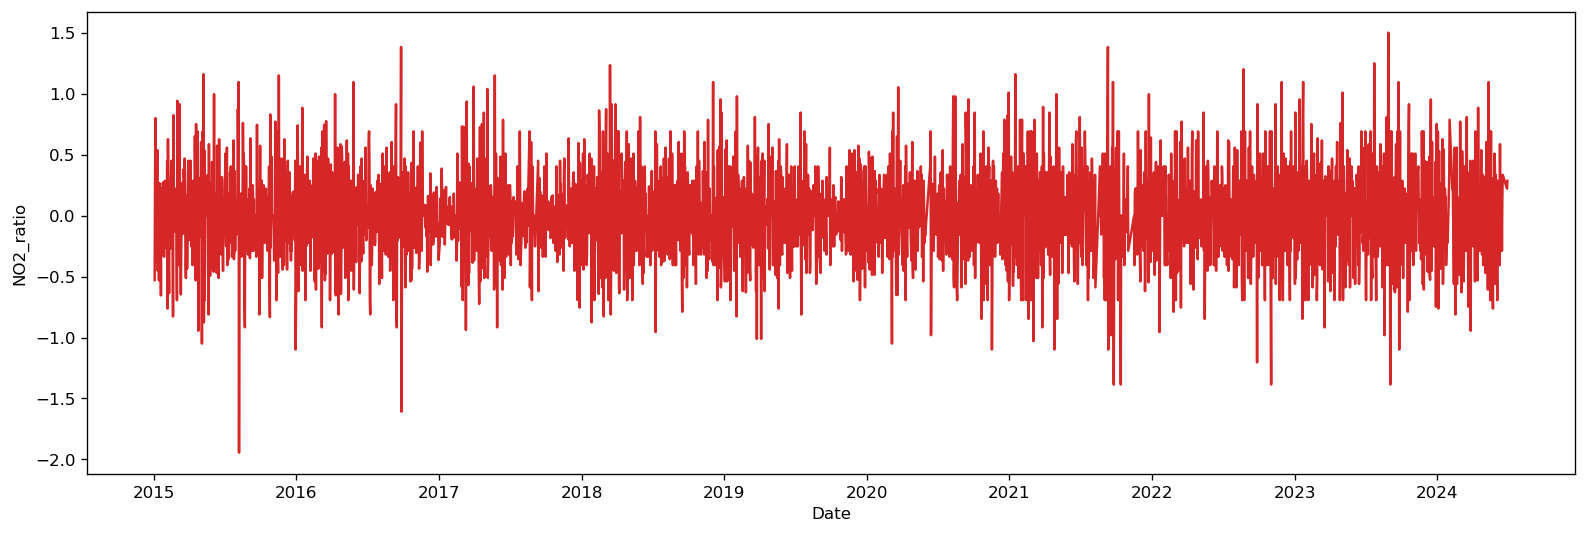

In [26]:
plot_df(qzu_df_ratio, qzu_df_ratio.date, qzu_df_ratio.NO2_ratio, xlabel ='Date', ylabel ='NO2_ratio')

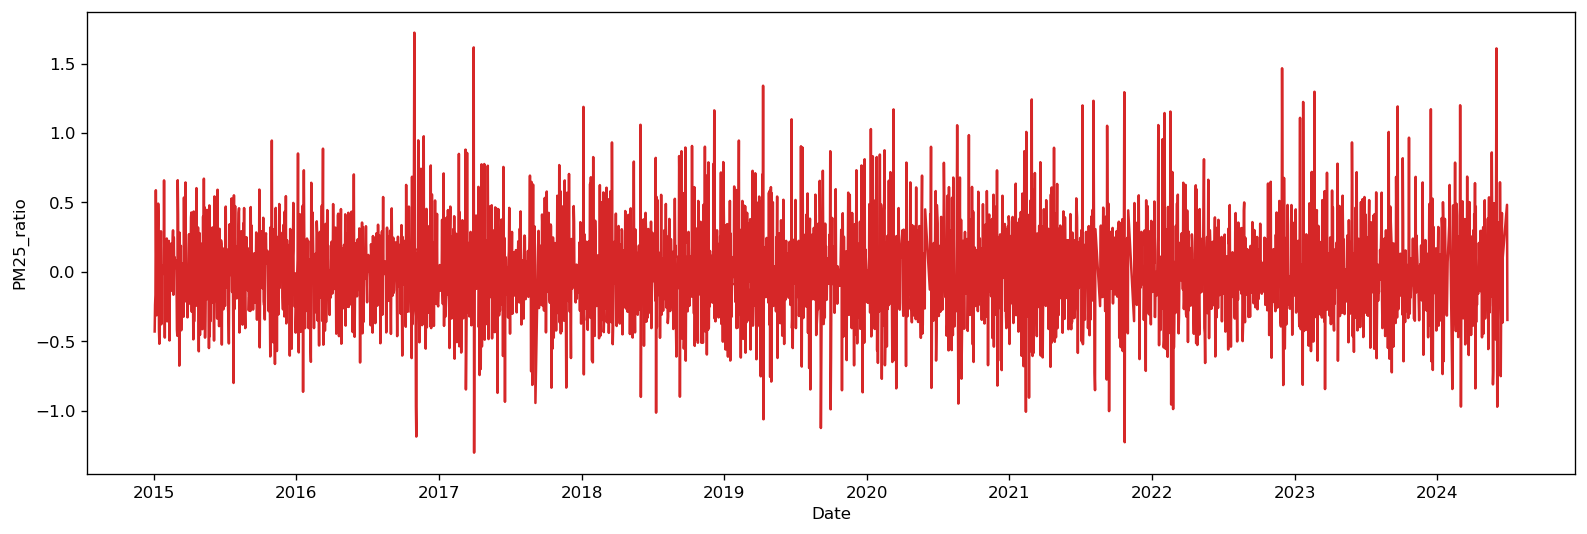

In [27]:
plot_df(qzu_df_ratio, qzu_df_ratio.date, qzu_df_ratio.PM25_ratio, xlabel ='Date', ylabel ='PM25_ratio')

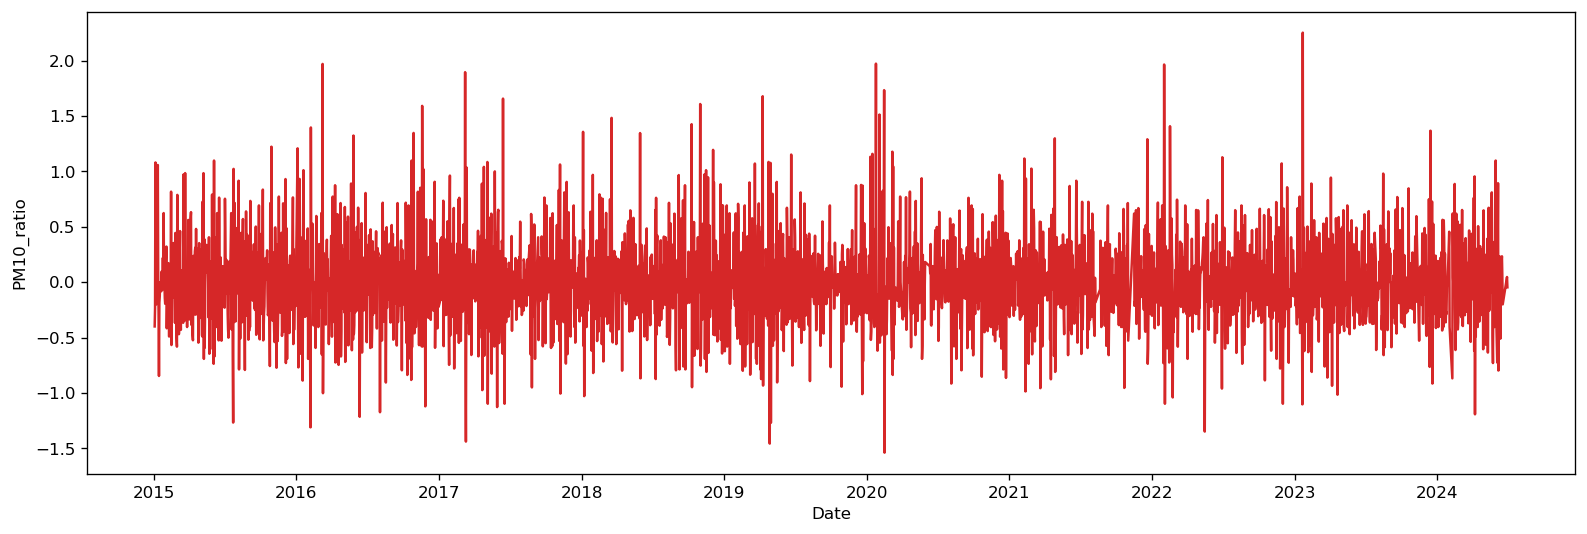

In [28]:
plot_df(qzu_df_ratio, qzu_df_ratio.date, qzu_df_ratio.PM10_ratio, xlabel ='Date', ylabel ='PM10_ratio')

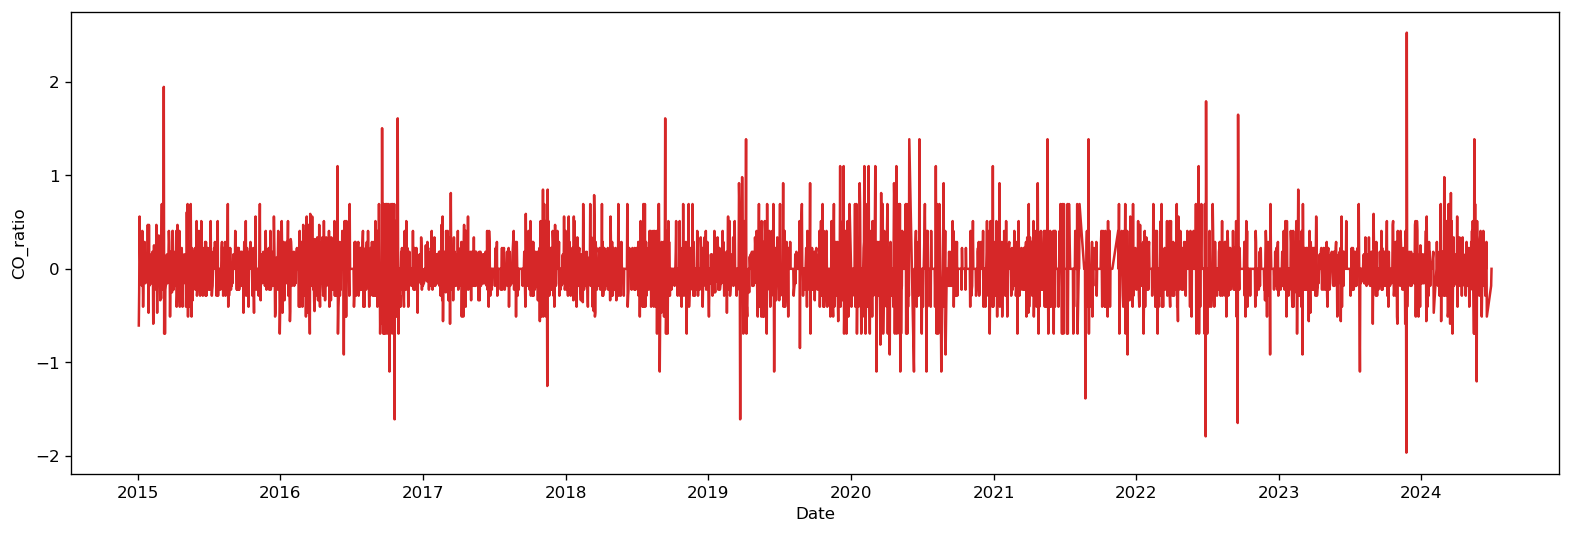

In [29]:
plot_df(qzu_df_ratio, qzu_df_ratio.date, qzu_df_ratio.CO_ratio, xlabel ='Date', ylabel ='CO_ratio')

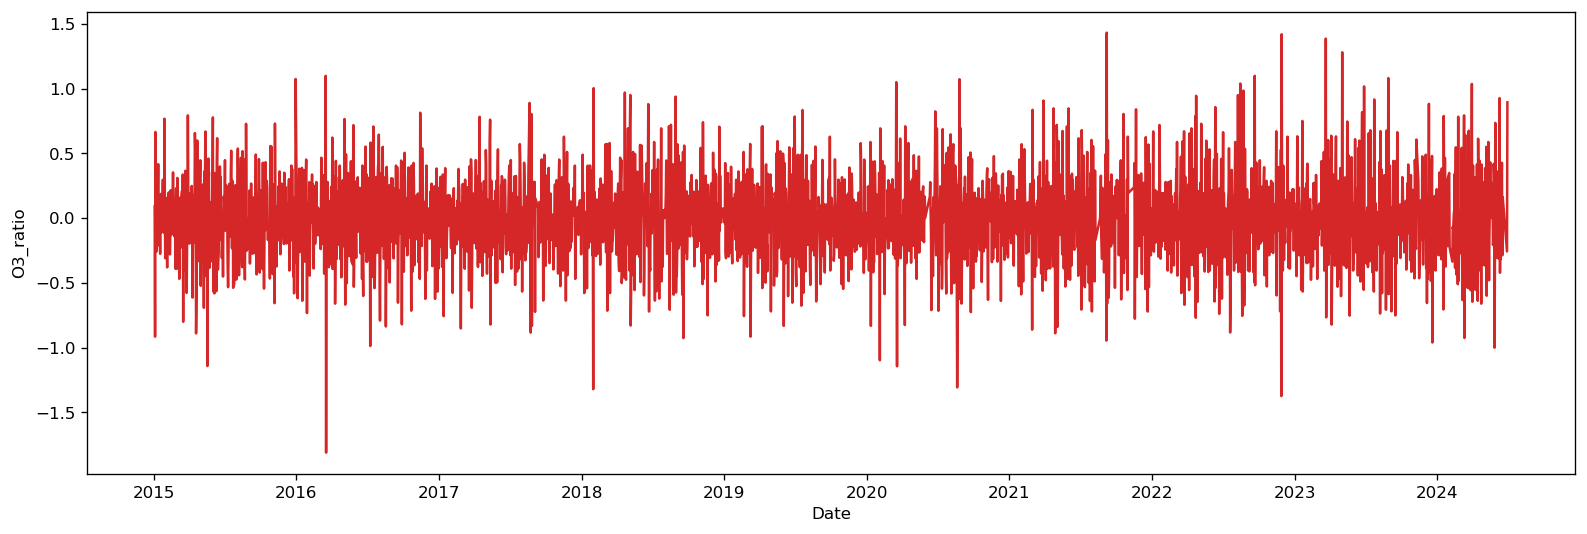

In [30]:
plot_df(qzu_df_ratio, qzu_df_ratio.date, qzu_df_ratio.O3_ratio, xlabel ='Date', ylabel ='O3_ratio')

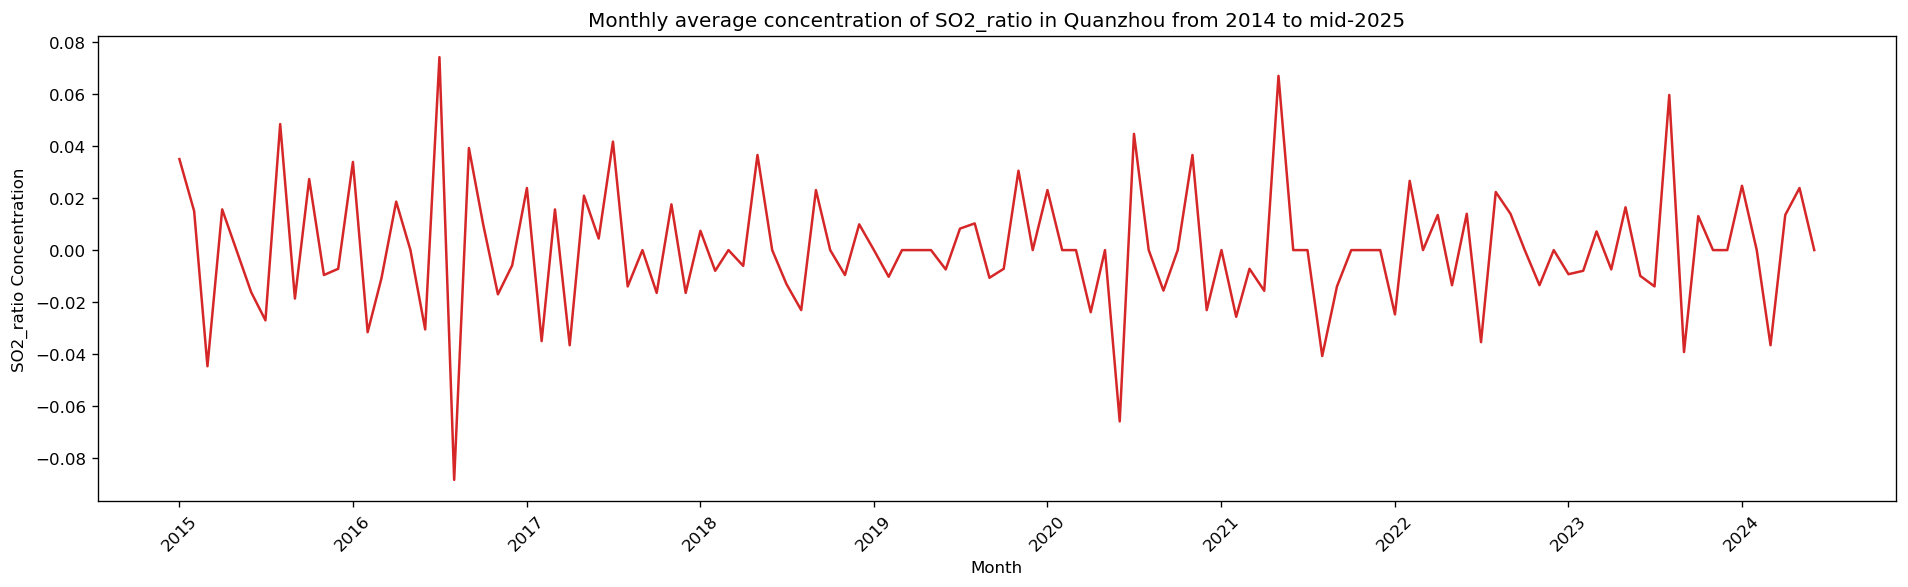

In [31]:
monthlyAverage(qzu_df_ratio, 'Quanzhou','SO2_ratio')

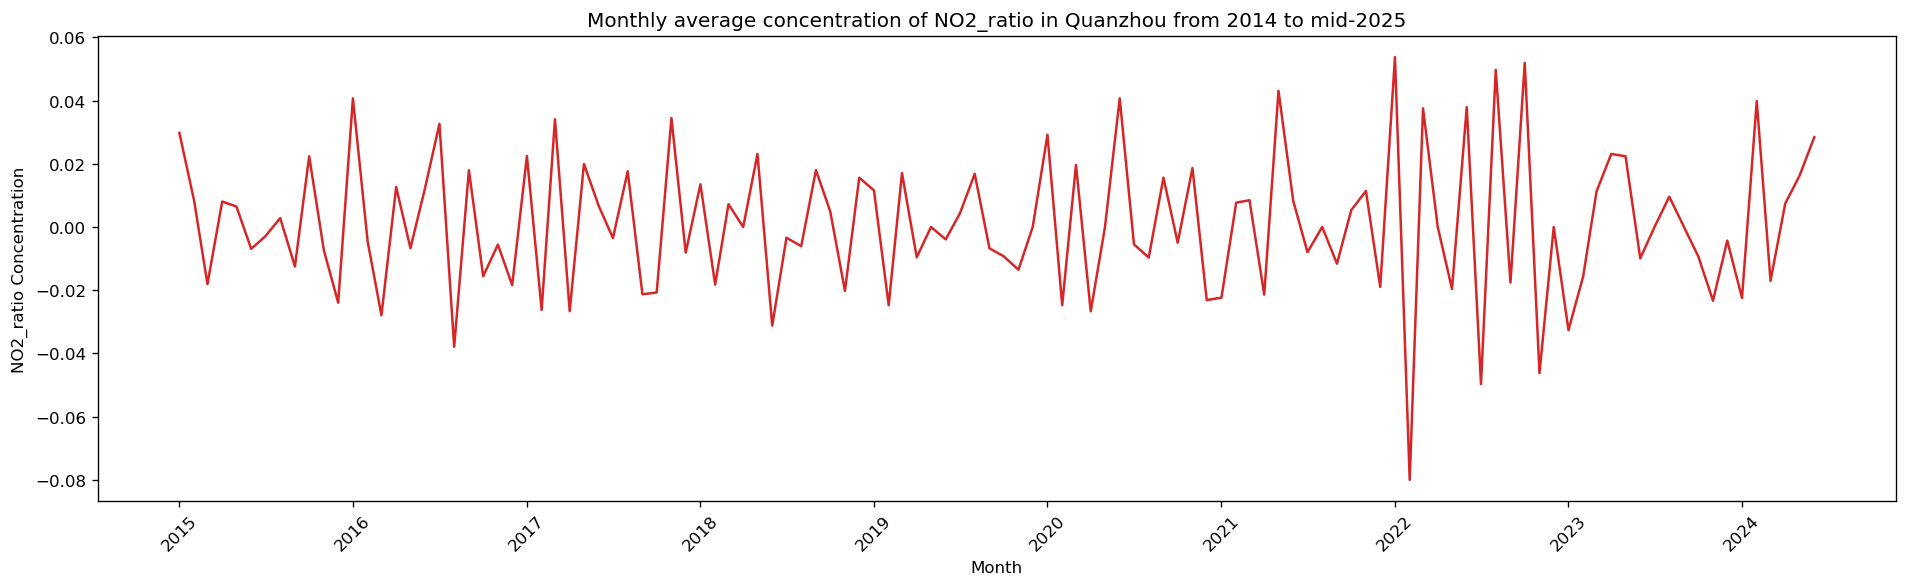

In [32]:
monthlyAverage(qzu_df_ratio, 'Quanzhou','NO2_ratio')

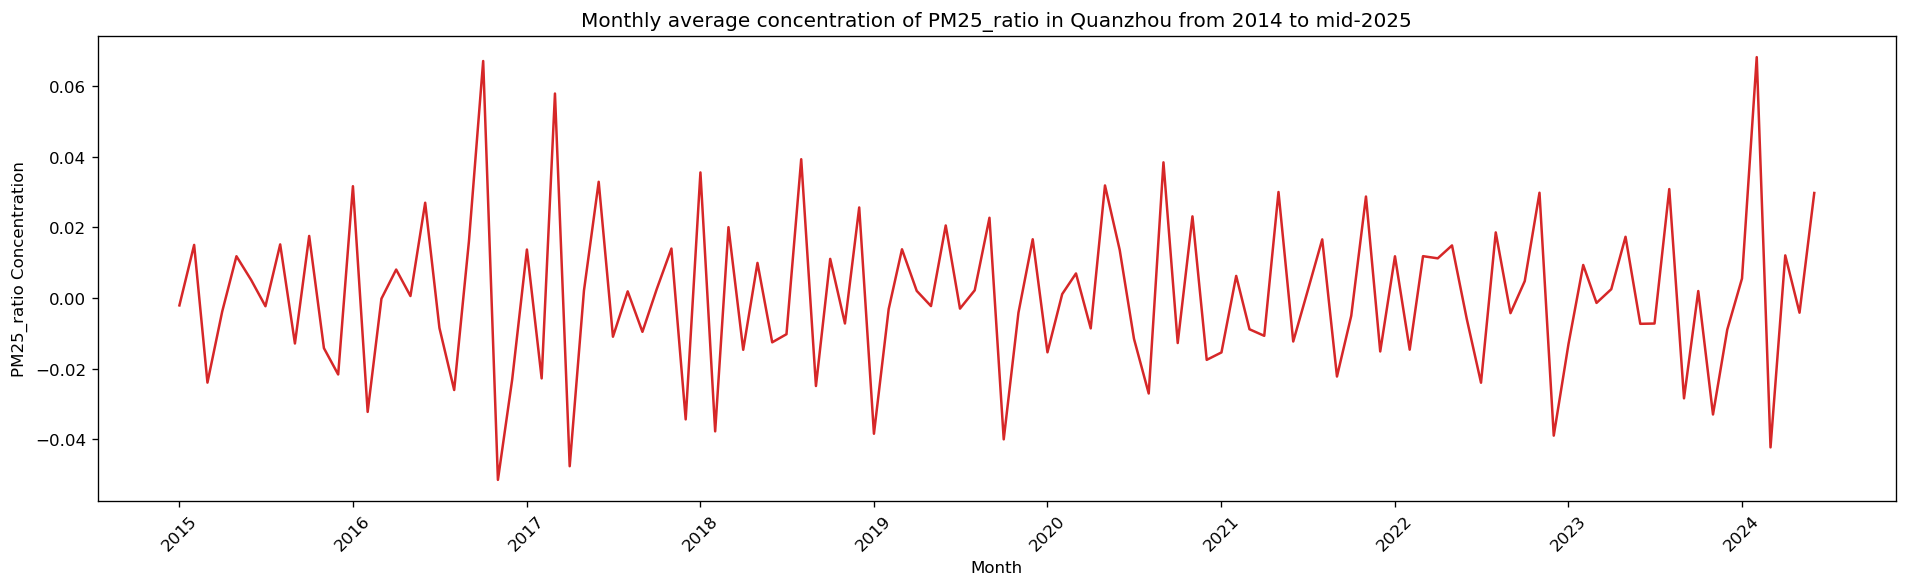

In [33]:
monthlyAverage(qzu_df_ratio, 'Quanzhou','PM25_ratio')

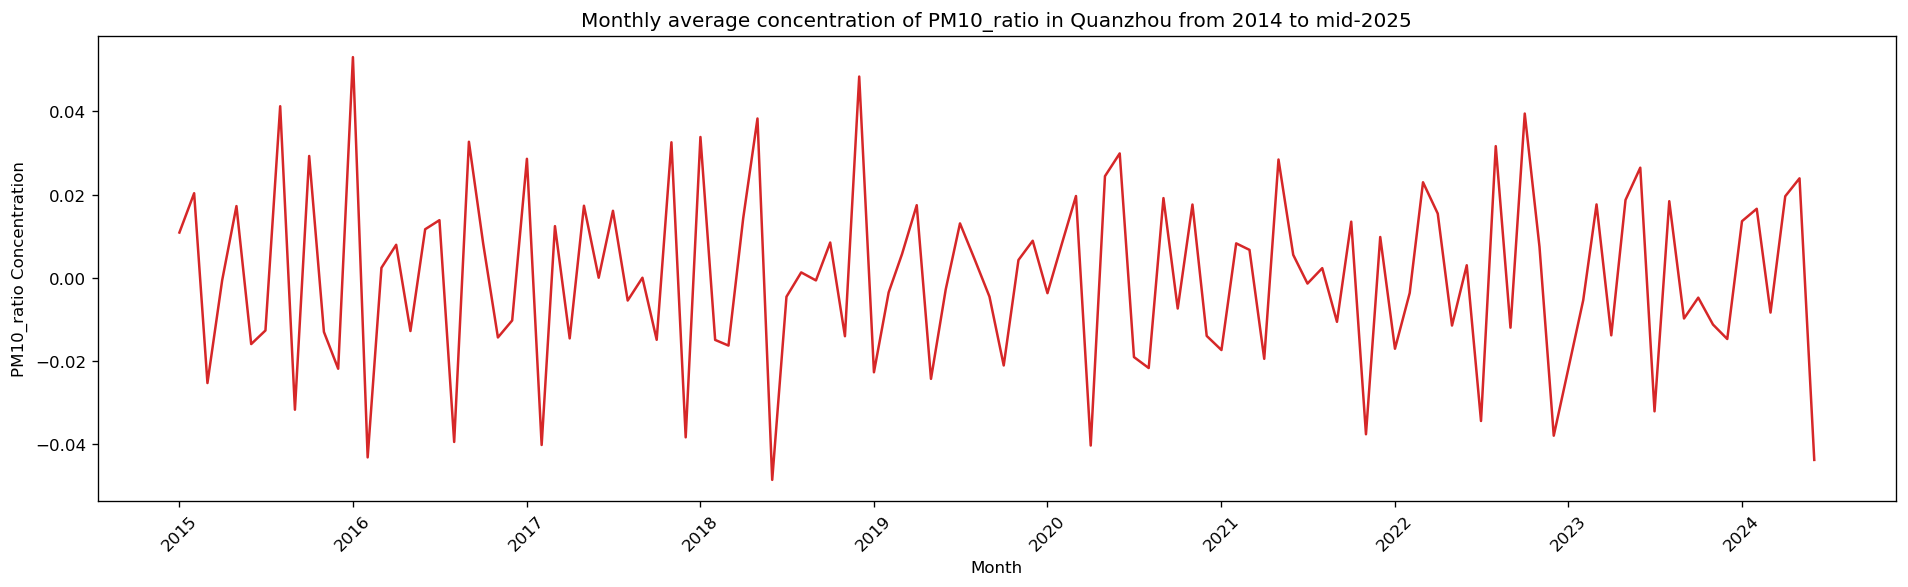

In [34]:
monthlyAverage(qzu_df_ratio, 'Quanzhou','PM10_ratio')

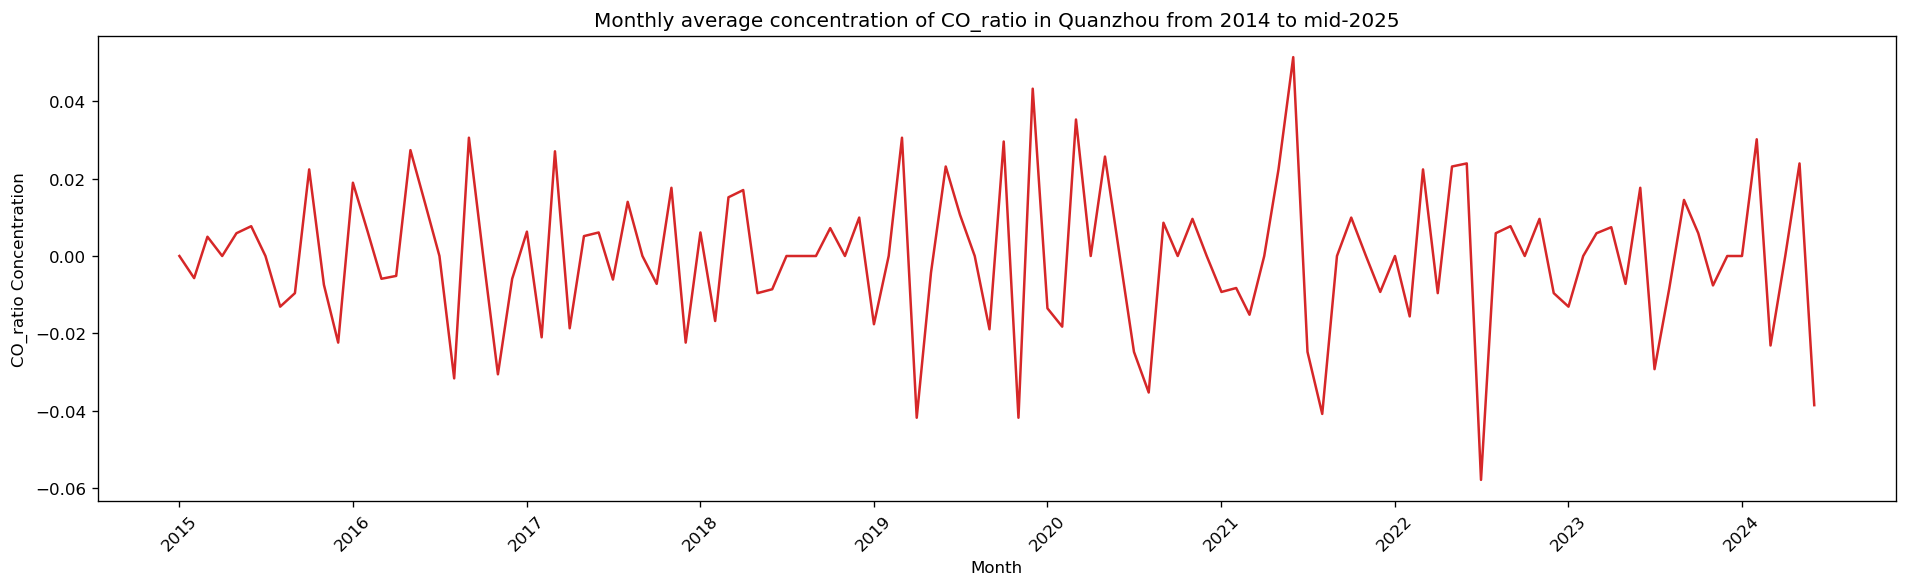

In [35]:
monthlyAverage(qzu_df_ratio, 'Quanzhou','CO_ratio')

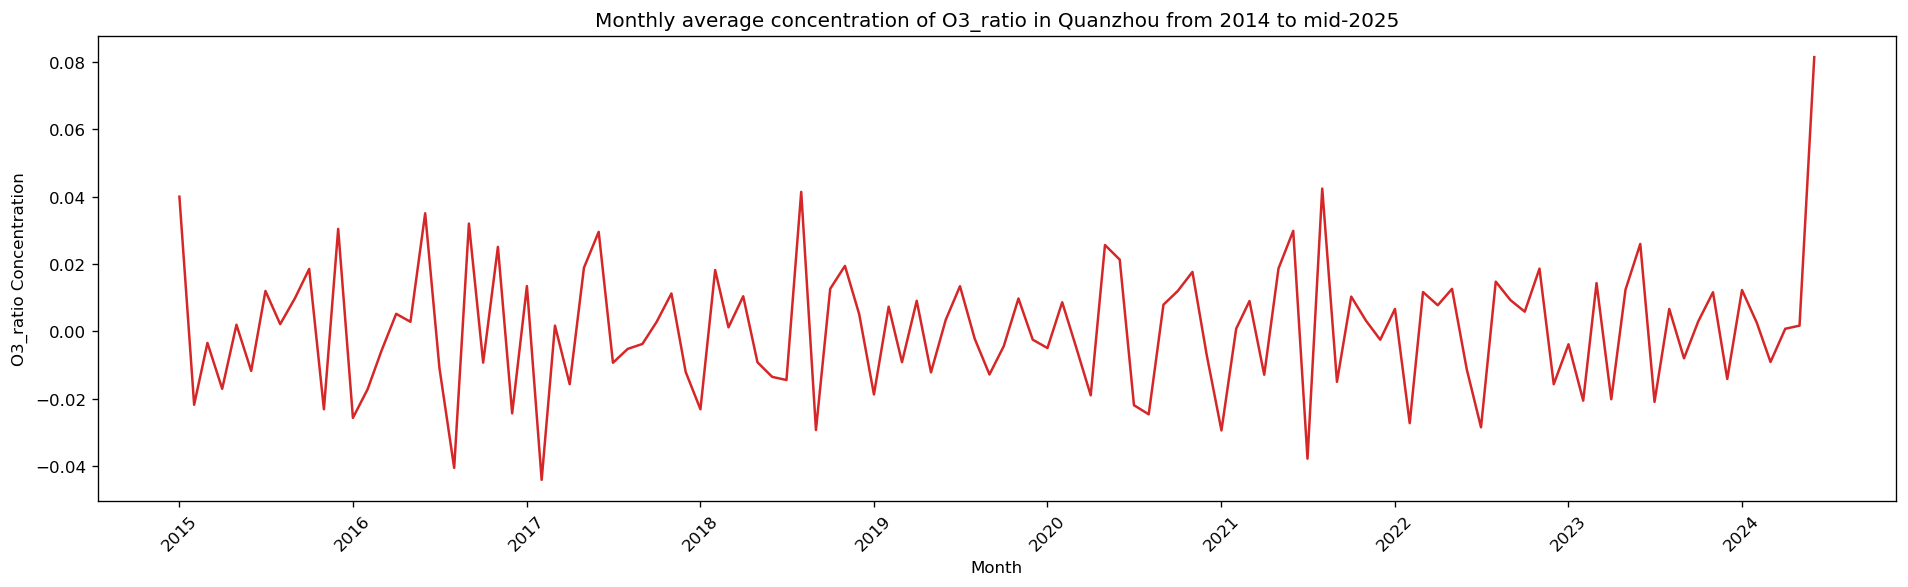

In [36]:
monthlyAverage(qzu_df_ratio, 'Quanzhou','O3_ratio')

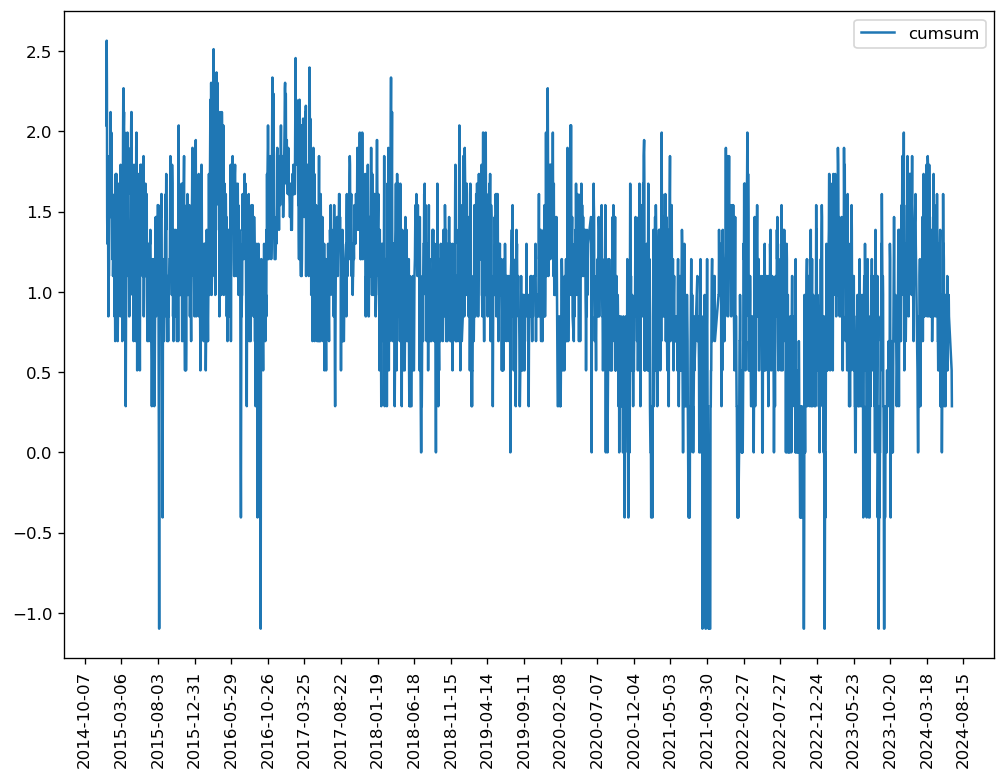

In [37]:
qzu_df_ratio['log_cumsum_no2'] = qzu_df_ratio['NO2_ratio'].cumsum()
plt.plot(qzu_df_ratio['date'] ,qzu_df_ratio['log_cumsum_no2'], label ='cumsum')
plt.xticks(rotation=90)
plt.legend()
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(30))

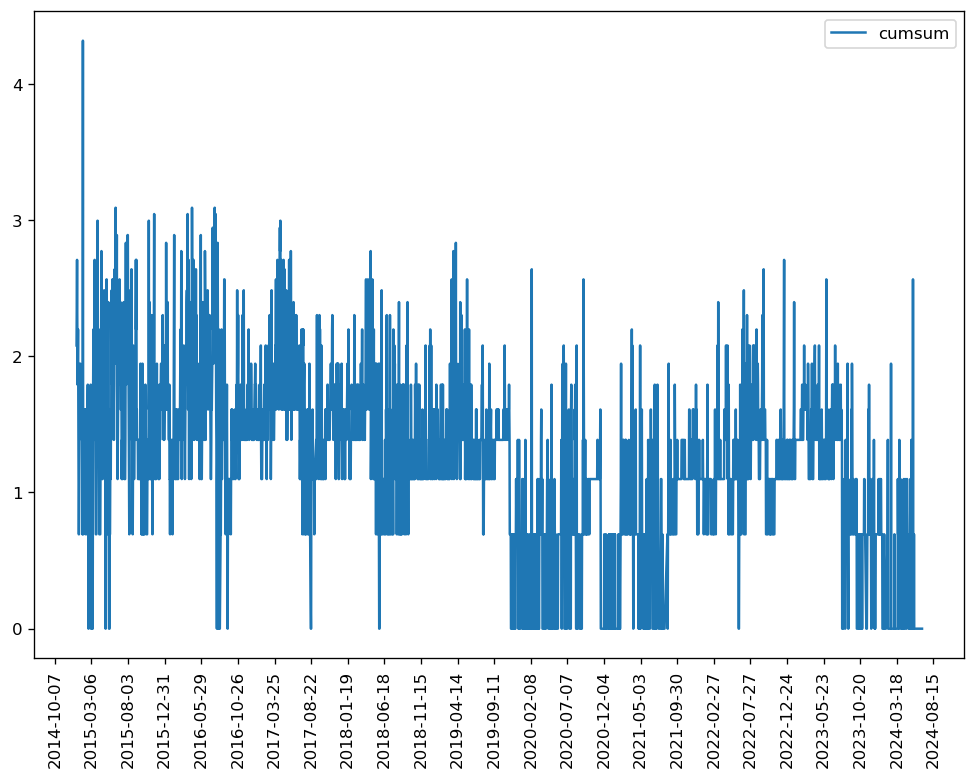

In [38]:
qzu_df_ratio['log_cumsum_so2'] = qzu_df_ratio['SO2_ratio'].cumsum()
plt.plot(qzu_df_ratio['date'] ,qzu_df_ratio['log_cumsum_so2'], label ='cumsum')
plt.xticks(rotation=90)
plt.legend()
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(30))

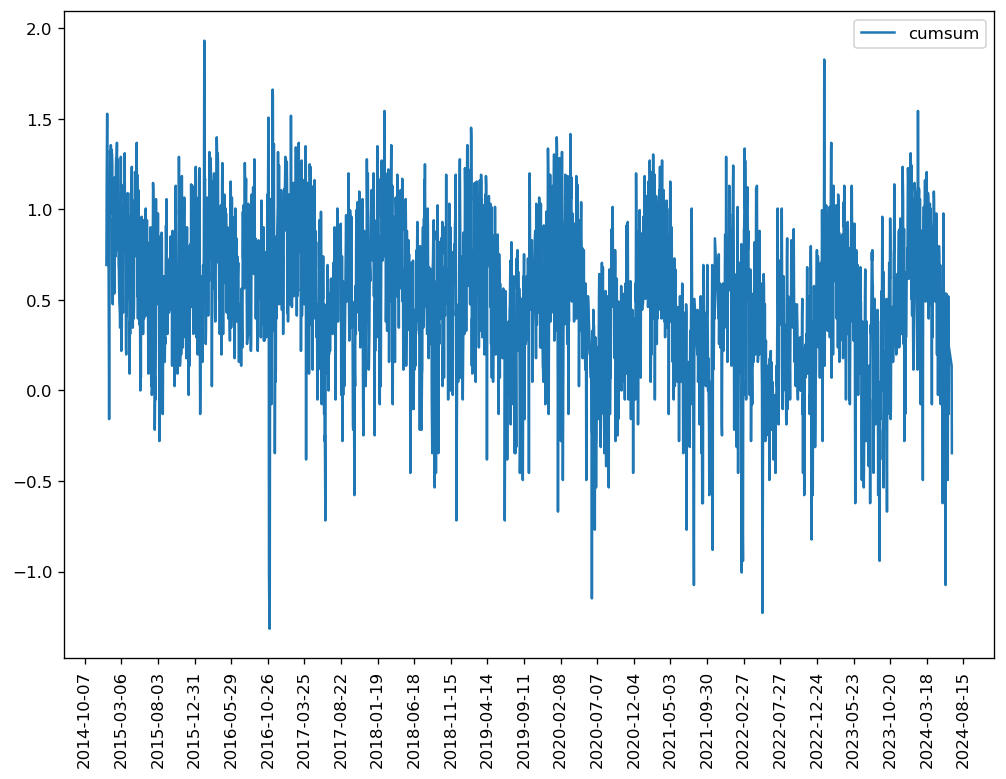

In [39]:
qzu_df_ratio['log_cumsum_pm25'] = qzu_df_ratio['PM25_ratio'].cumsum()
plt.plot(qzu_df_ratio['date'] ,qzu_df_ratio['log_cumsum_pm25'], label ='cumsum')
plt.xticks(rotation=90)
plt.legend()
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(30))

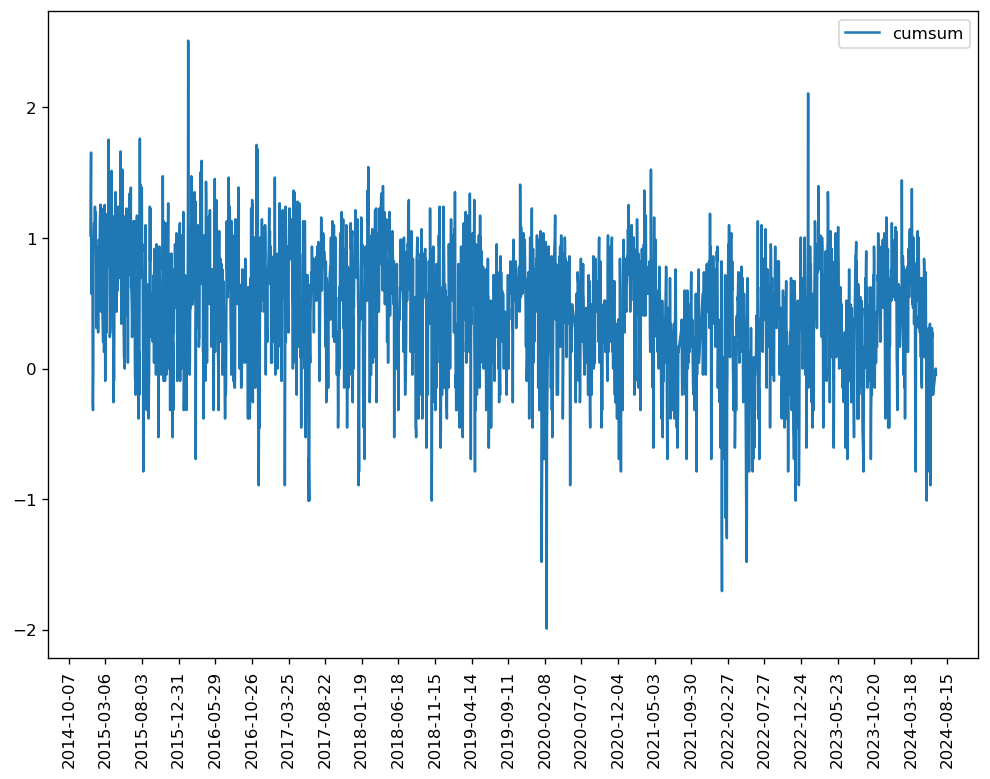

In [40]:
qzu_df_ratio['log_cumsum_pm10'] = qzu_df_ratio['PM10_ratio'].cumsum()
plt.plot(qzu_df_ratio['date'] ,qzu_df_ratio['log_cumsum_pm10'], label ='cumsum')
plt.xticks(rotation=90)
plt.legend()
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(30))

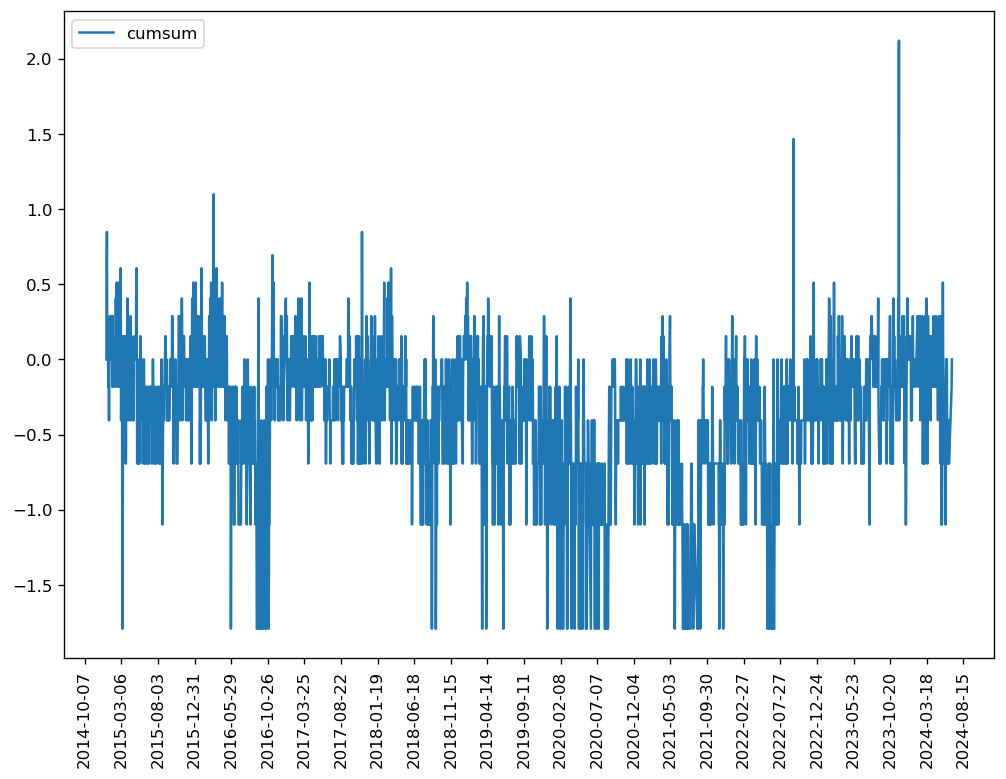

In [41]:
qzu_df_ratio['log_cumsum_co'] = qzu_df_ratio['CO_ratio'].cumsum()
plt.plot(qzu_df_ratio['date'] ,qzu_df_ratio['log_cumsum_co'], label ='cumsum')
plt.xticks(rotation=90)
plt.legend()
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(30))

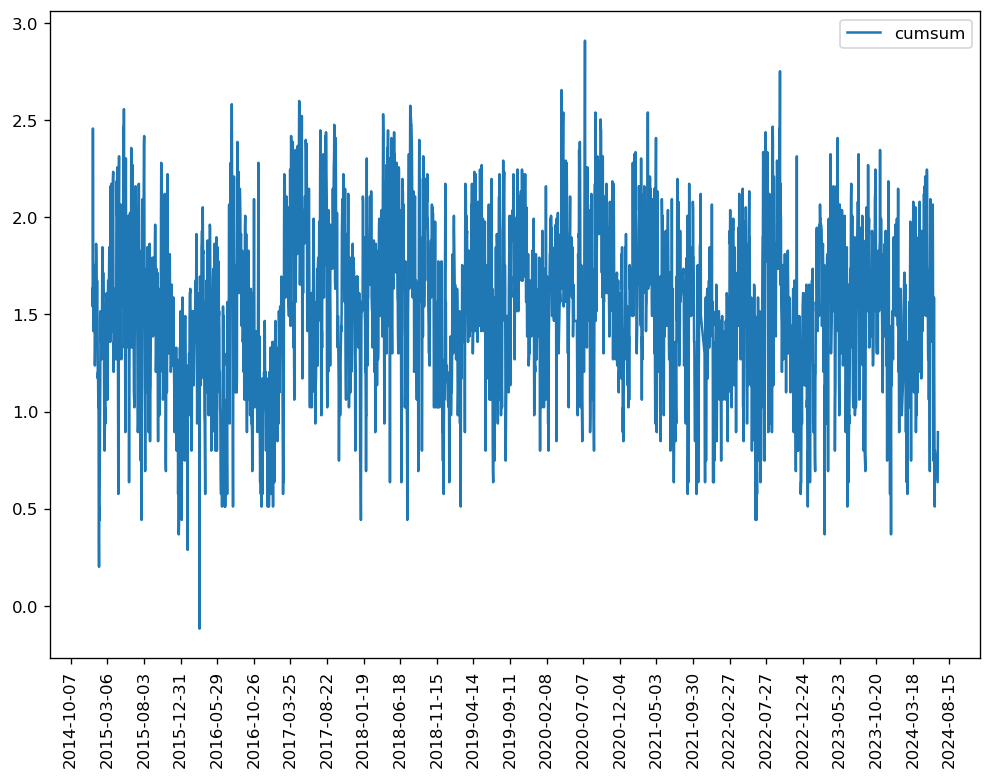

In [42]:
qzu_df_ratio['log_cumsum_o3'] = qzu_df_ratio['O3_ratio'].cumsum()
plt.plot(qzu_df_ratio['date'] ,qzu_df_ratio['log_cumsum_o3'], label ='cumsum')
plt.xticks(rotation=90)
plt.legend()
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(30))

# Eliminating Trend and Seasonality

If we eliminate trend and seasonality, we can observe clear volatility clustering. This is reasonable given the nature of air pollutants: government policies often have multi-year effects, weather patterns remain relatively stable within a season, and most decisions that impact air quality tend to have long-term consequences.

In [43]:
!pip install arch

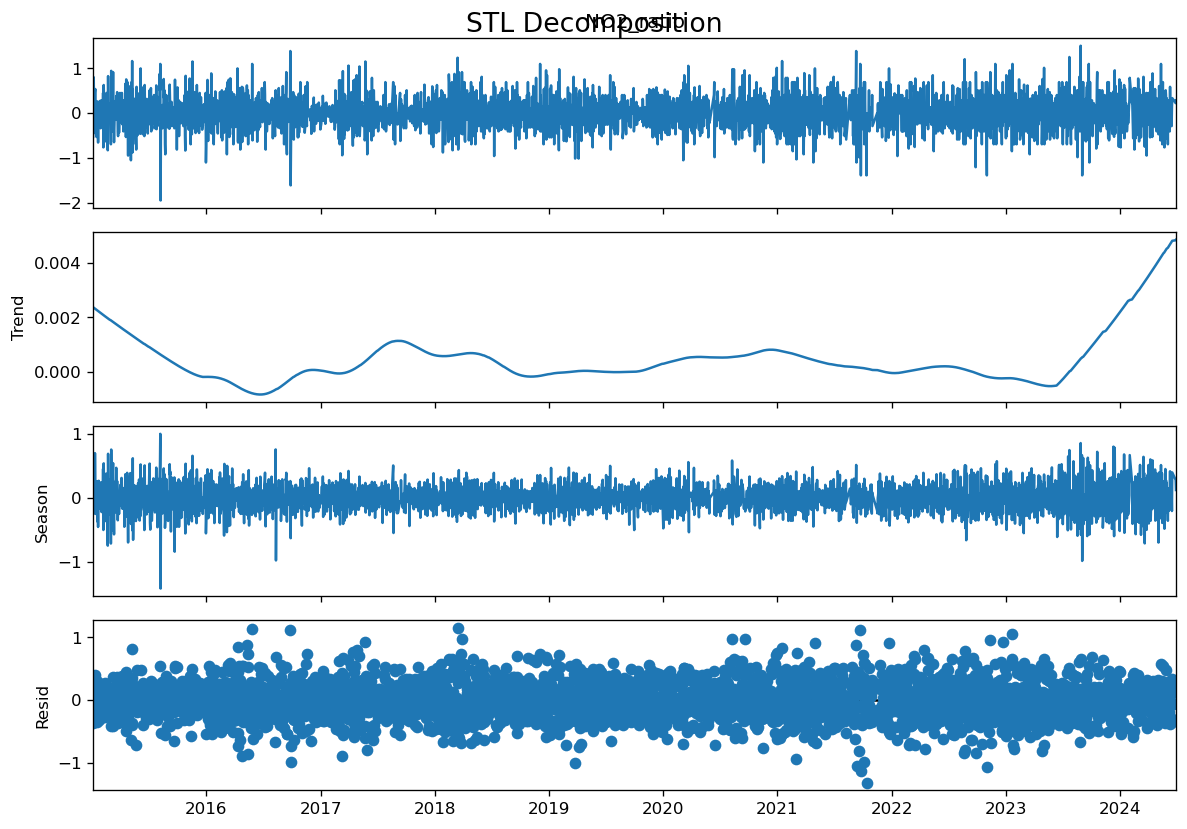

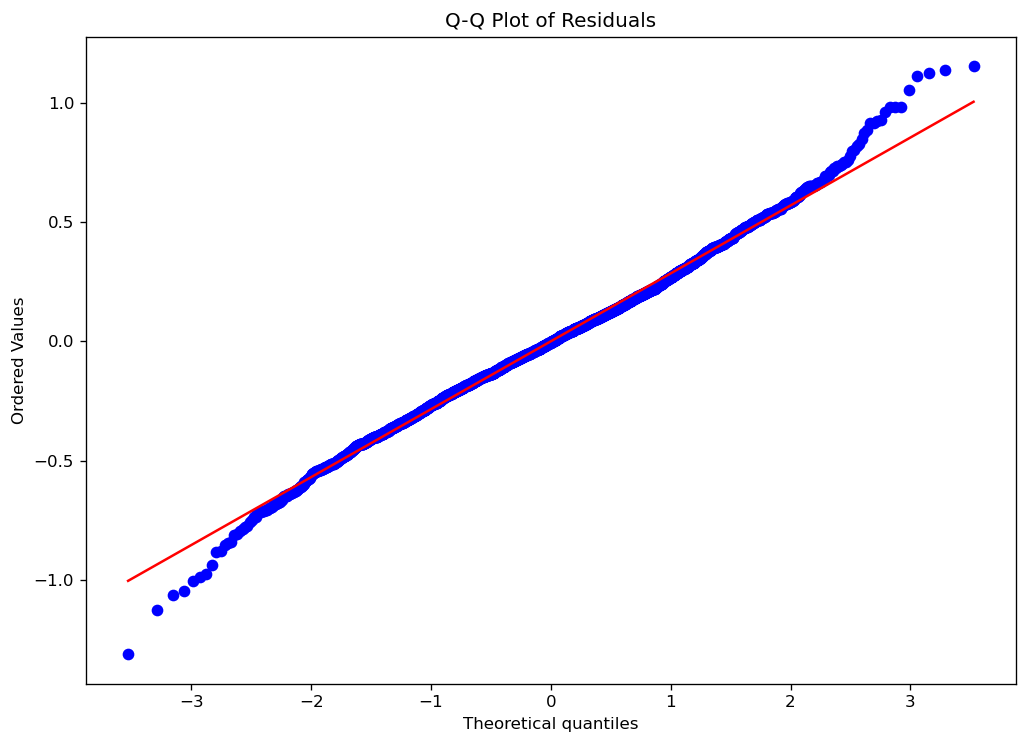

Shapiro-Wilk Test statistic=0.9949, p-value=0.0000
❌ Residuals do not look normally distributed (reject H0)


In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL
from scipy.stats import shapiro, probplot

qzu_df_ratio['date'] = pd.to_datetime(qzu_df_ratio['date'])
qzu_df_ratio = qzu_df_ratio.sort_values('date')
qzu_df_ratio.set_index('date', inplace=True)

df = qzu_df_ratio.copy()


stl = STL(df['NO2_ratio'], period=365) 
res_NO2 = stl.fit()

res_NO2.plot()
plt.suptitle('STL Decomposition', fontsize=16)
plt.show()


residuals_NO2 = res_NO2.resid.dropna()

# Q-Q Plot
probplot(residuals_NO2, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

# Shapiro-Wilk Test
stat, p = shapiro(residuals_NO2)
print('Shapiro-Wilk Test statistic=%.4f, p-value=%.4f' % (stat, p))

if p > 0.05:
    print("✅ Residuals look normally distributed (fail to reject H0)")
else:
    print("❌ Residuals do not look normally distributed (reject H0)")

                        Constant Mean - GARCH Model Results                         
Dep. Variable:                        resid   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                            GARCH   Log-Likelihood:               -8048.61
Distribution:      Standardized Student's t   AIC:                           16107.2
Method:                  Maximum Likelihood   BIC:                           16137.7
                                              No. Observations:                 3298
Date:                      Fri, Jul 11 2025   Df Residuals:                     3297
Time:                              02:50:09   Df Model:                            1
                                  Mean Model                                  
                  coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------

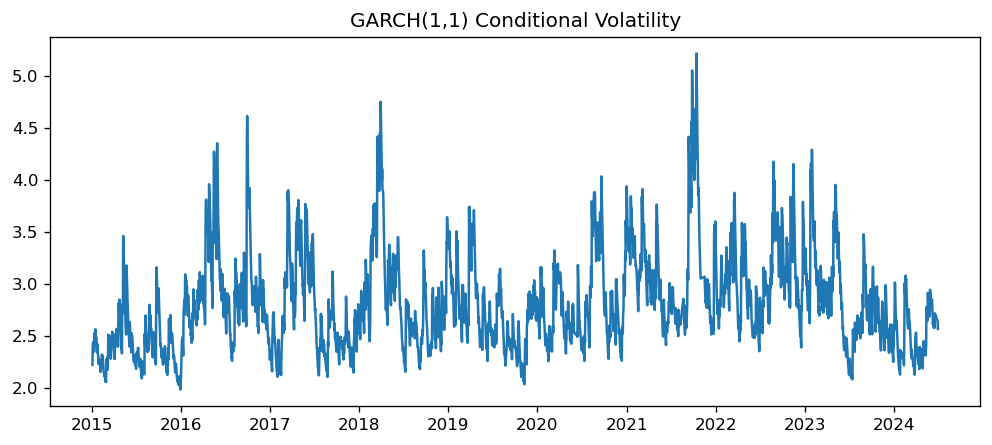

In [45]:
from arch import arch_model
import matplotlib.pyplot as plt

# residuals
residuals_NO2 = res_NO2.resid.dropna()

# GARCH(1,1) model with t-distribution
garch_model = arch_model(residuals_NO2, vol='GARCH', p=1, q=1,dist ='t', rescale=True)
garch_fit = garch_model.fit(disp="off")
print(garch_fit.summary())

# visualization of conditional volatility 
plt.figure(figsize=(10,4))
plt.plot(garch_fit.conditional_volatility)
plt.title("GARCH(1,1) Conditional Volatility")
plt.show()

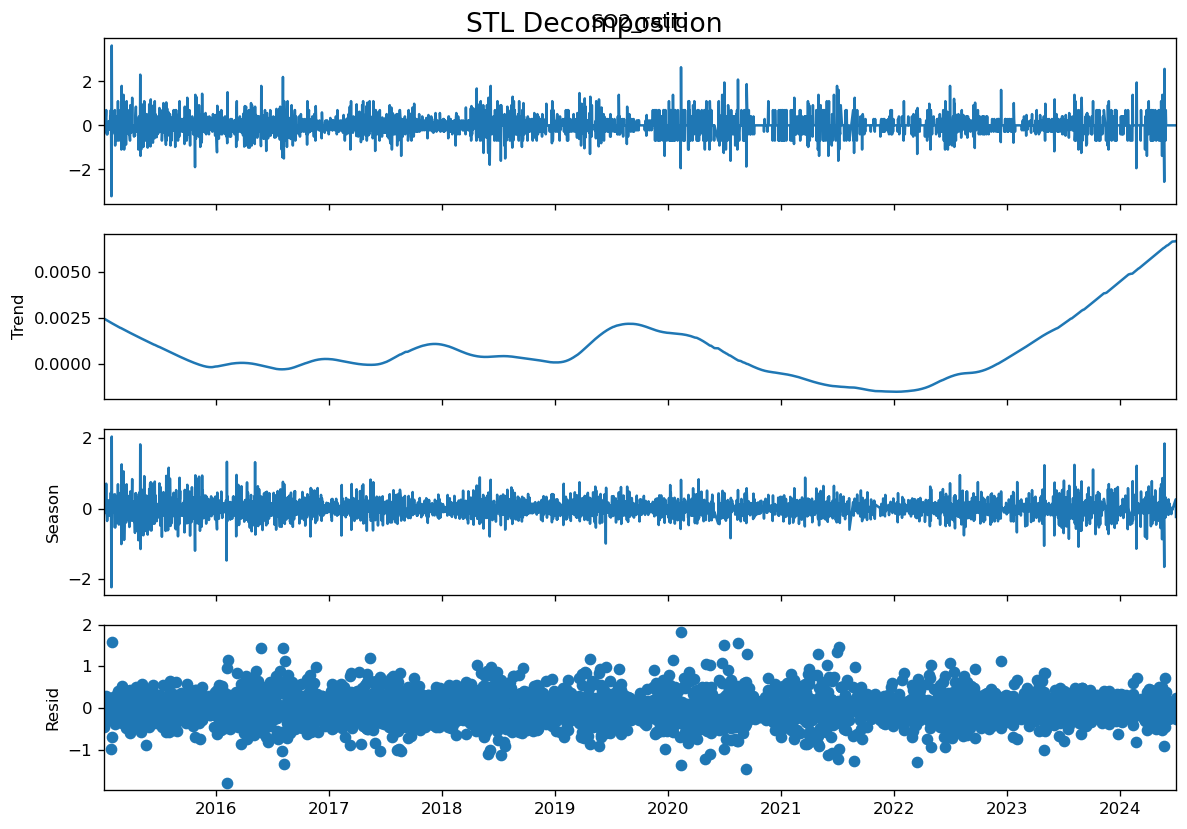

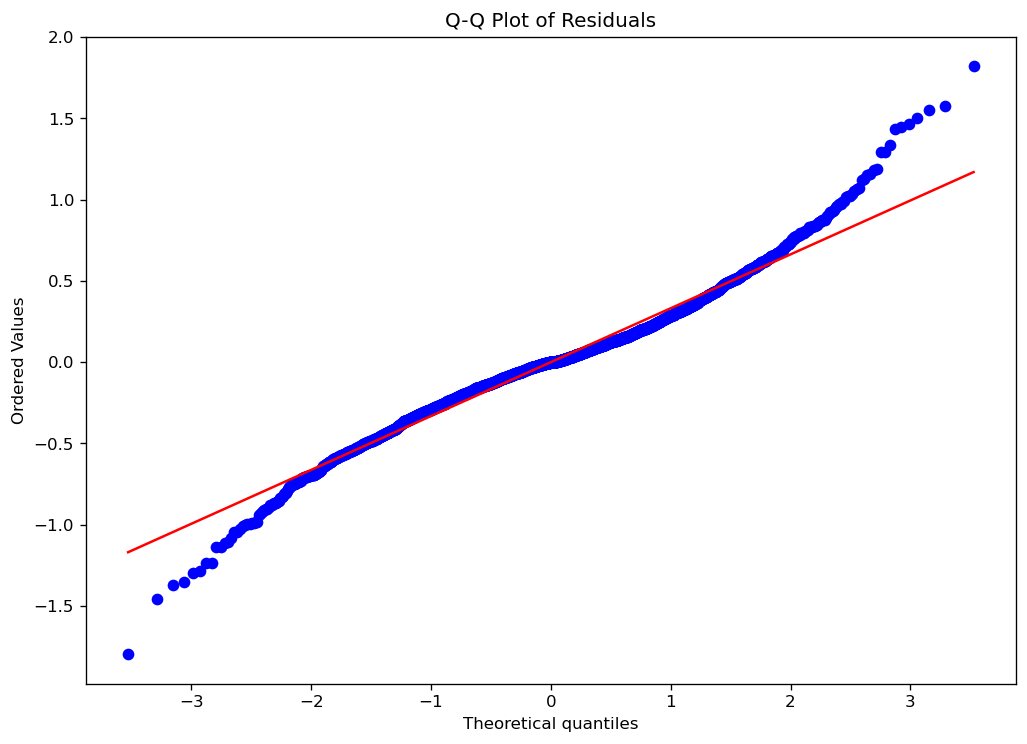

Shapiro-Wilk Test statistic=0.9746, p-value=0.0000
❌ Residuals do not look normally distributed (reject H0)
                        Constant Mean - GARCH Model Results                         
Dep. Variable:                        resid   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                            GARCH   Log-Likelihood:               -798.843
Distribution:      Standardized Student's t   AIC:                           1607.69
Method:                  Maximum Likelihood   BIC:                           1638.19
                                              No. Observations:                 3298
Date:                      Fri, Jul 11 2025   Df Residuals:                     3297
Time:                              02:50:11   Df Model:                            1
                                  Mean Model                                  
                  coef    std err          t    

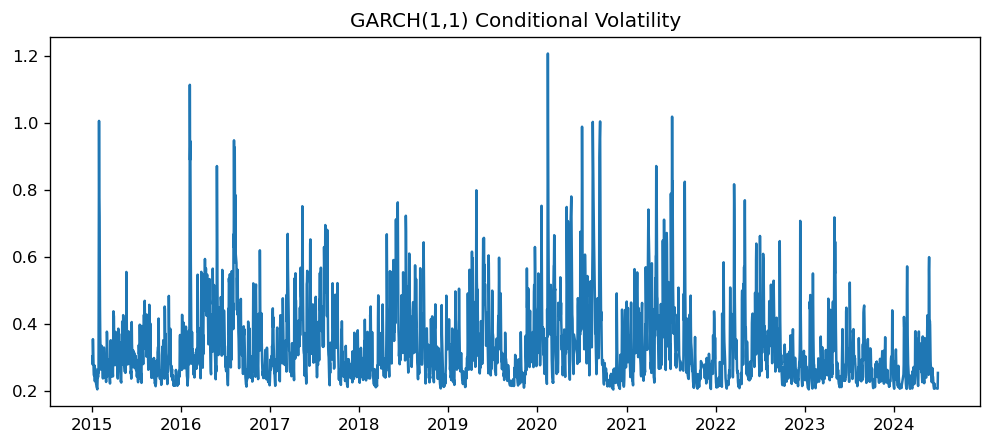

In [46]:
stl = STL(df['SO2_ratio'], period=365) 
res_SO2 = stl.fit()

res_SO2.plot()
plt.suptitle('STL Decomposition', fontsize=16)
plt.show()


residuals_SO2 = res_SO2.resid.dropna()

# Q-Q Plot
probplot(residuals_SO2, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

# Shapiro-Wilk Test
stat, p = shapiro(residuals_SO2)
print('Shapiro-Wilk Test statistic=%.4f, p-value=%.4f' % (stat, p))

if p > 0.05:
    print("✅ Residuals look normally distributed (fail to reject H0)")
else:
    print("❌ Residuals do not look normally distributed (reject H0)")

# residuals
residuals_SO2 = res_SO2.resid.dropna()

# GARCH(1,1) model with t-distribution
garch_model = arch_model(residuals_SO2, vol='GARCH', p=1, q=1,dist ='t', rescale=True)
garch_fit = garch_model.fit(disp="off")
print(garch_fit.summary())

# visualization of conditional volatility 
plt.figure(figsize=(10,4))
plt.plot(garch_fit.conditional_volatility)
plt.title("GARCH(1,1) Conditional Volatility")
plt.show()

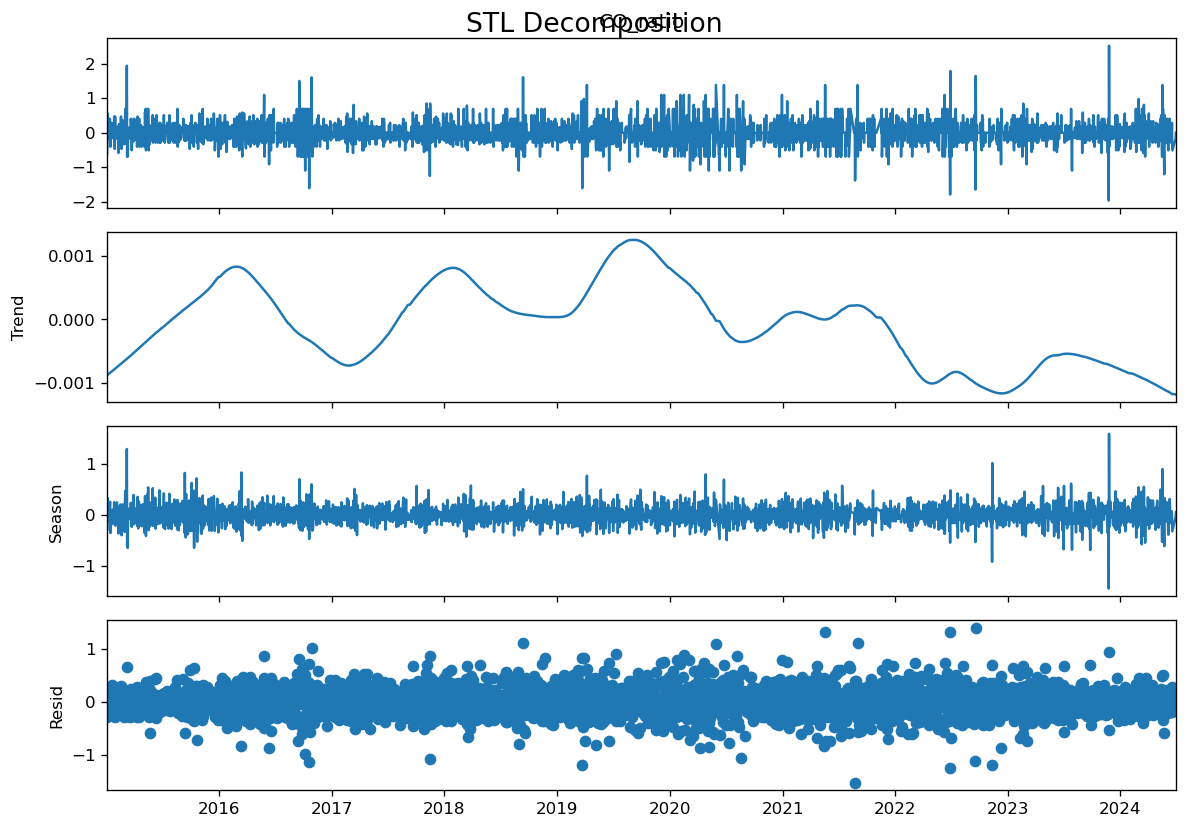

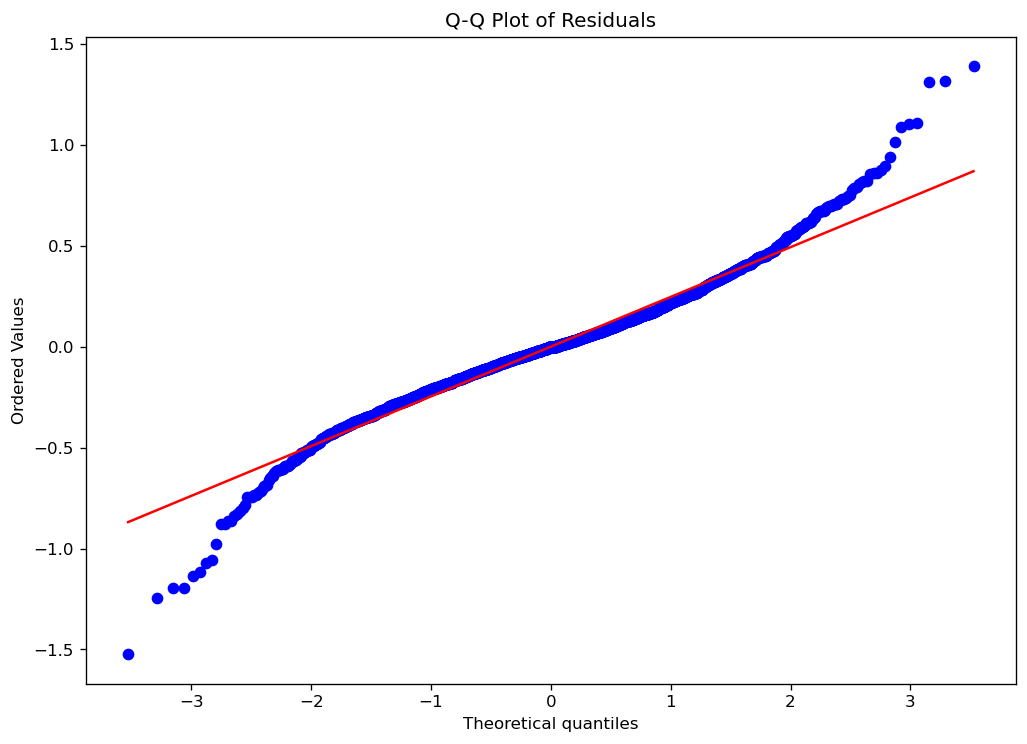

Shapiro-Wilk Test statistic=0.9696, p-value=0.0000
❌ Residuals do not look normally distributed (reject H0)
                        Constant Mean - GARCH Model Results                         
Dep. Variable:                        resid   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                            GARCH   Log-Likelihood:               -7478.30
Distribution:      Standardized Student's t   AIC:                           14966.6
Method:                  Maximum Likelihood   BIC:                           14997.1
                                              No. Observations:                 3298
Date:                      Fri, Jul 11 2025   Df Residuals:                     3297
Time:                              02:50:13   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      

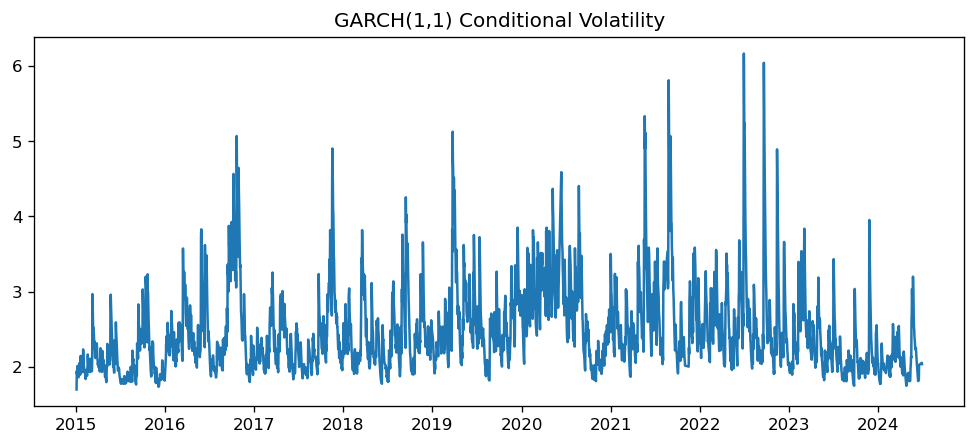

In [47]:
stl = STL(df['CO_ratio'], period=365) 
res_CO = stl.fit()

res_CO.plot()
plt.suptitle('STL Decomposition', fontsize=16)
plt.show()


residuals_CO = res_CO.resid.dropna()

# Q-Q Plot
probplot(residuals_CO, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

# Shapiro-Wilk Test
stat, p = shapiro(residuals_CO)
print('Shapiro-Wilk Test statistic=%.4f, p-value=%.4f' % (stat, p))

if p > 0.05:
    print("✅ Residuals look normally distributed (fail to reject H0)")
else:
    print("❌ Residuals do not look normally distributed (reject H0)")

# residuals
residuals_CO = res_CO.resid.dropna()

# GARCH(1,1) model with t-distribution
garch_model = arch_model(residuals_CO, vol='GARCH', p=1, q=1,dist ='t', rescale=True)
garch_fit = garch_model.fit(disp="off")
print(garch_fit.summary())

# visualization of conditional volatility 
plt.figure(figsize=(10,4))
plt.plot(garch_fit.conditional_volatility)
plt.title("GARCH(1,1) Conditional Volatility")
plt.show()

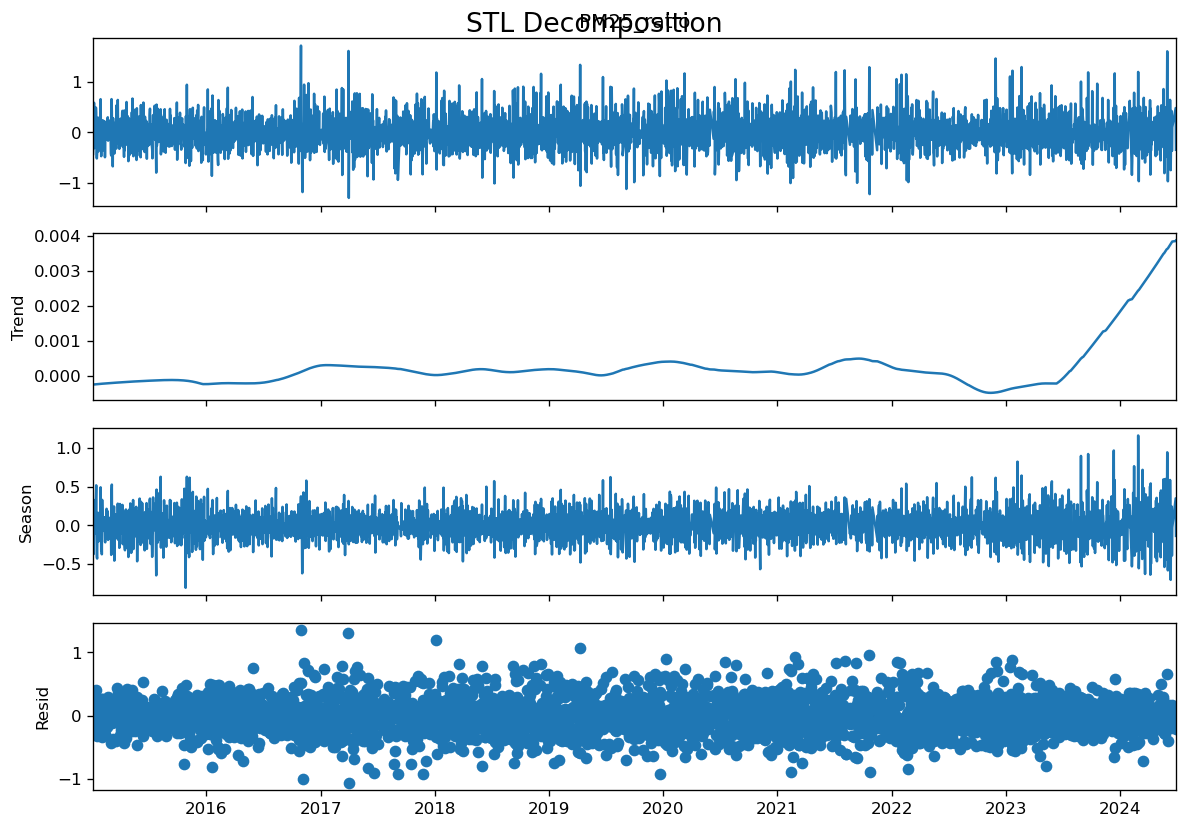

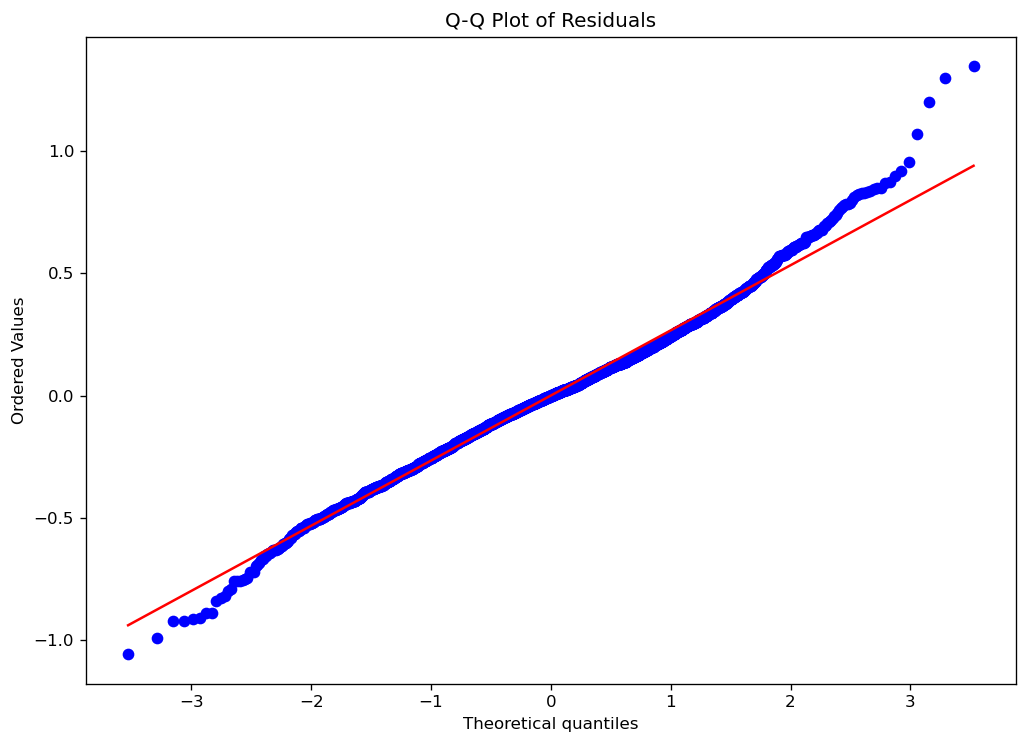

Shapiro-Wilk Test statistic=0.9906, p-value=0.0000
❌ Residuals do not look normally distributed (reject H0)
                        Constant Mean - GARCH Model Results                         
Dep. Variable:                        resid   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                            GARCH   Log-Likelihood:               -7803.54
Distribution:      Standardized Student's t   AIC:                           15617.1
Method:                  Maximum Likelihood   BIC:                           15647.6
                                              No. Observations:                 3298
Date:                      Fri, Jul 11 2025   Df Residuals:                     3297
Time:                              02:50:15   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      

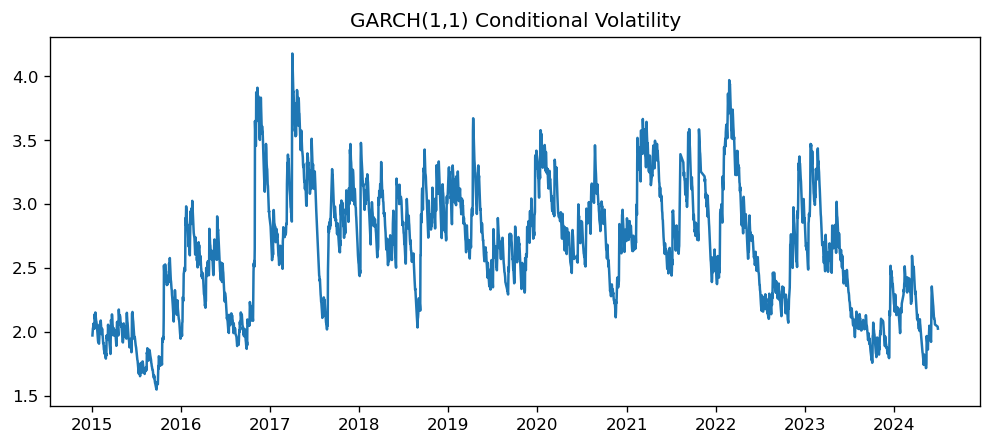

In [48]:
stl = STL(df['PM25_ratio'], period=365) 
res_PM25 = stl.fit()

res_PM25.plot()
plt.suptitle('STL Decomposition', fontsize=16)
plt.show()


residuals_PM25 = res_PM25.resid.dropna()

# Q-Q Plot
probplot(residuals_PM25, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

# Shapiro-Wilk Test
stat, p = shapiro(residuals_PM25)
print('Shapiro-Wilk Test statistic=%.4f, p-value=%.4f' % (stat, p))

if p > 0.05:
    print("✅ Residuals look normally distributed (fail to reject H0)")
else:
    print("❌ Residuals do not look normally distributed (reject H0)")

# residuals
residuals_PM25 = res_PM25.resid.dropna()

# GARCH(1,1) model with t-distribution
garch_model = arch_model(residuals_PM25, vol='GARCH', p=1, q=1,dist ='t', rescale=True)
garch_fit = garch_model.fit(disp="off")
print(garch_fit.summary())

# visualization of conditional volatility 
plt.figure(figsize=(10,4))
plt.plot(garch_fit.conditional_volatility)
plt.title("GARCH(1,1) Conditional Volatility")
plt.show()

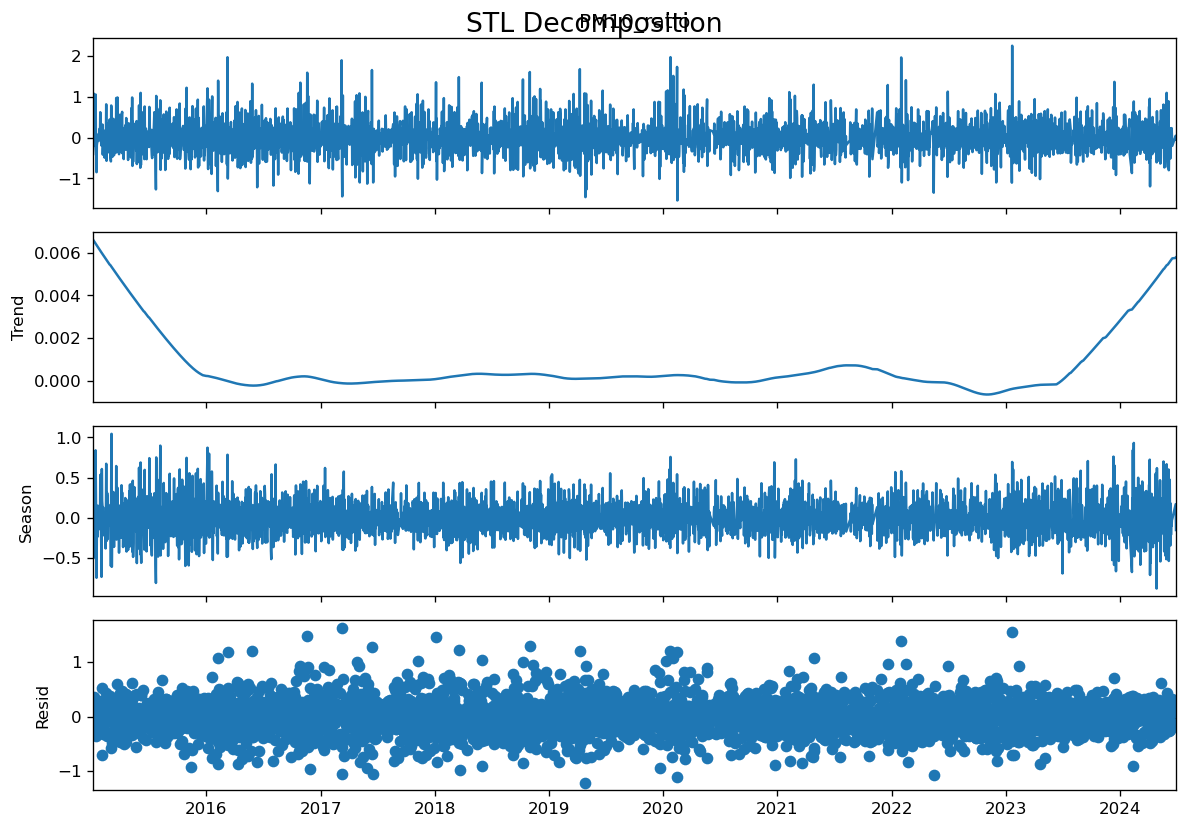

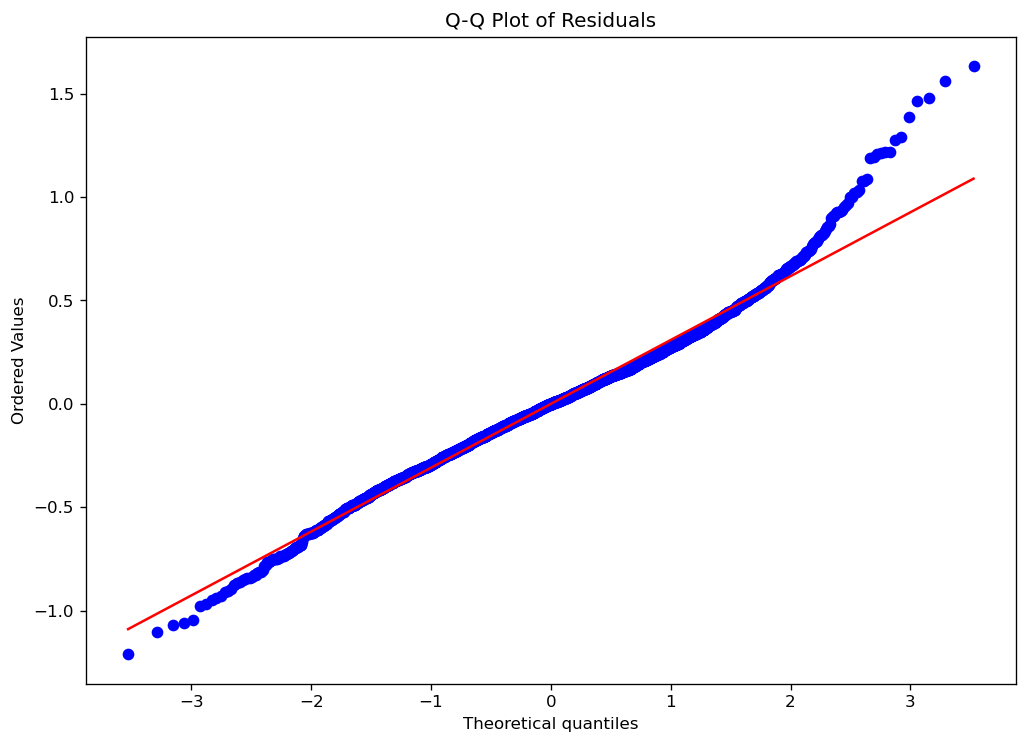

Shapiro-Wilk Test statistic=0.9839, p-value=0.0000
❌ Residuals do not look normally distributed (reject H0)
                        Constant Mean - GARCH Model Results                         
Dep. Variable:                        resid   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                            GARCH   Log-Likelihood:               -8289.41
Distribution:      Standardized Student's t   AIC:                           16588.8
Method:                  Maximum Likelihood   BIC:                           16619.3
                                              No. Observations:                 3298
Date:                      Fri, Jul 11 2025   Df Residuals:                     3297
Time:                              02:50:17   Df Model:                            1
                                  Mean Model                                  
                  coef    std err          t    

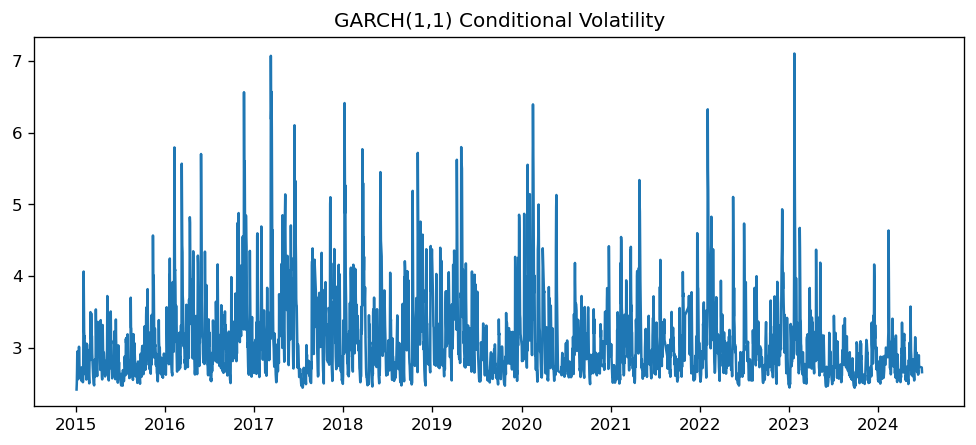

In [49]:
stl = STL(df['PM10_ratio'], period=365) 
res_PM10 = stl.fit()

res_PM10.plot()
plt.suptitle('STL Decomposition', fontsize=16)
plt.show()


residuals_PM10 = res_PM10.resid.dropna()

# Q-Q Plot
probplot(residuals_PM10, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

# Shapiro-Wilk Test
stat, p = shapiro(residuals_PM10)
print('Shapiro-Wilk Test statistic=%.4f, p-value=%.4f' % (stat, p))

if p > 0.05:
    print("✅ Residuals look normally distributed (fail to reject H0)")
else:
    print("❌ Residuals do not look normally distributed (reject H0)")

# residuals
residuals_PM10 = res_PM10.resid.dropna()

# GARCH(1,1) model with t-distribution
garch_model = arch_model(residuals_PM10, vol='GARCH', p=1, q=1,dist ='t', rescale=True)
garch_fit = garch_model.fit(disp="off")
print(garch_fit.summary())

# visualization of conditional volatility 
plt.figure(figsize=(10,4))
plt.plot(garch_fit.conditional_volatility)
plt.title("GARCH(1,1) Conditional Volatility")
plt.show()

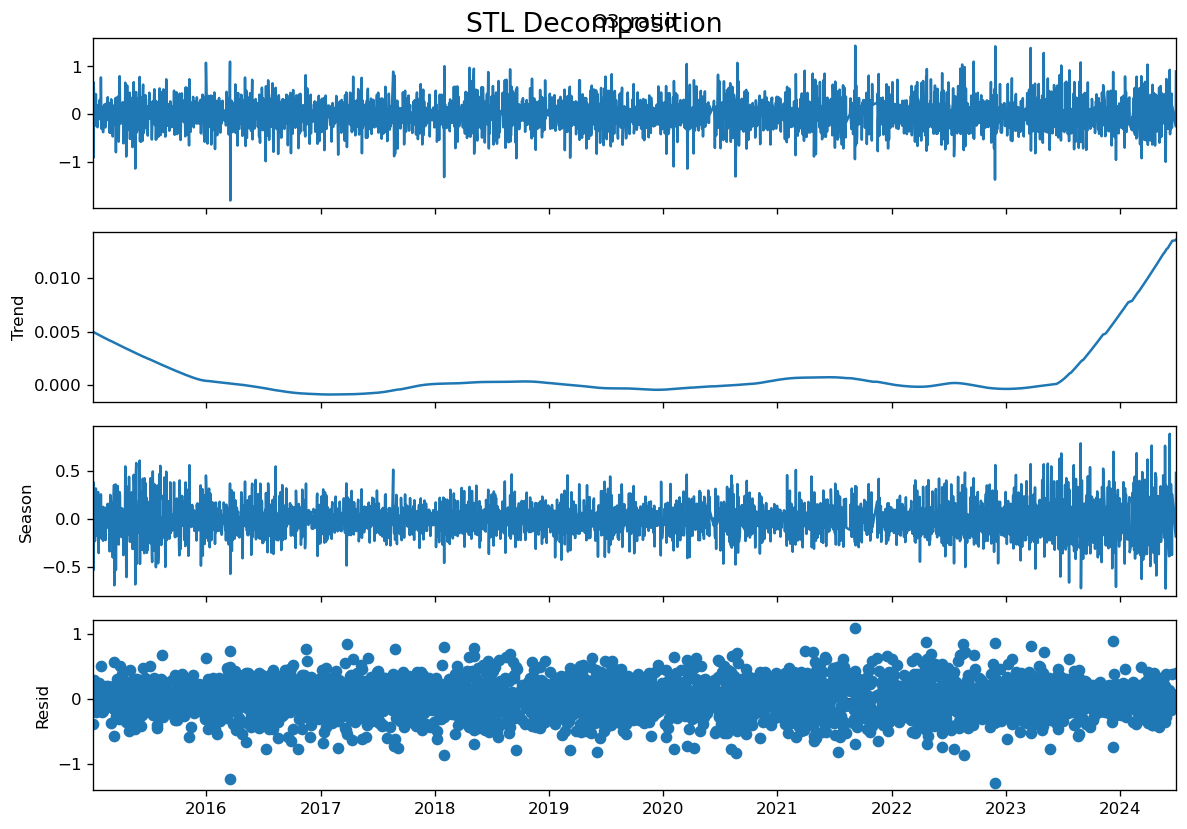

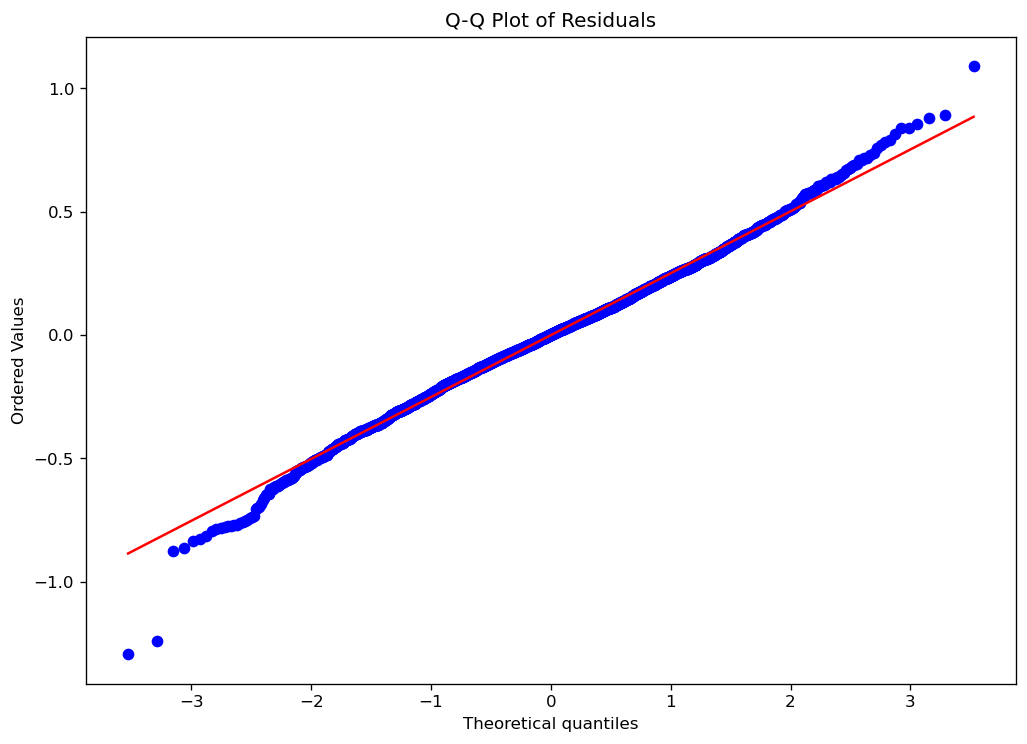

Shapiro-Wilk Test statistic=0.9945, p-value=0.0000
❌ Residuals do not look normally distributed (reject H0)
                        Constant Mean - GARCH Model Results                         
Dep. Variable:                        resid   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                            GARCH   Log-Likelihood:               -7642.39
Distribution:      Standardized Student's t   AIC:                           15294.8
Method:                  Maximum Likelihood   BIC:                           15325.3
                                              No. Observations:                 3298
Date:                      Fri, Jul 11 2025   Df Residuals:                     3297
Time:                              02:50:19   Df Model:                            1
                                  Mean Model                                  
                  coef    std err          t    

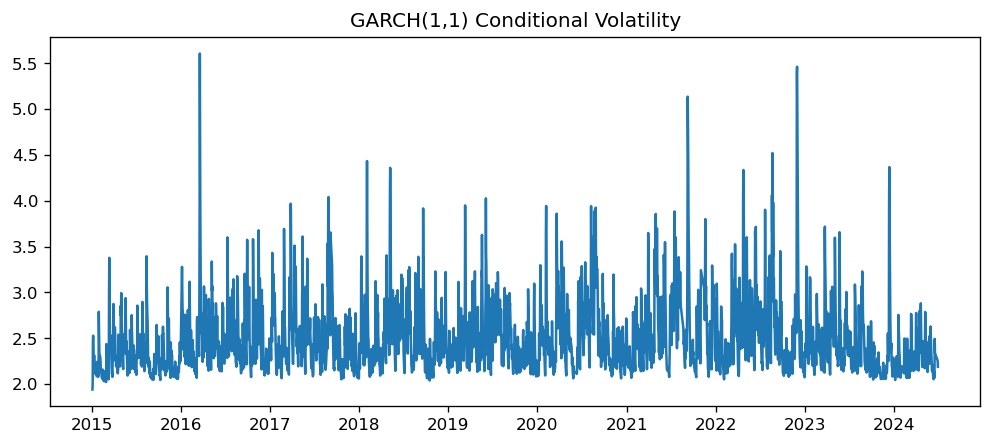

In [50]:
stl = STL(df['O3_ratio'], period=365) 
res_O3 = stl.fit()

res_O3.plot()
plt.suptitle('STL Decomposition', fontsize=16)
plt.show()


residuals_O3 = res_O3.resid.dropna()

# Q-Q Plot
probplot(residuals_O3, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

# Shapiro-Wilk Test
stat, p = shapiro(residuals_O3)
print('Shapiro-Wilk Test statistic=%.4f, p-value=%.4f' % (stat, p))

if p > 0.05:
    print("✅ Residuals look normally distributed (fail to reject H0)")
else:
    print("❌ Residuals do not look normally distributed (reject H0)")

# residuals
residuals_O3 = res_O3.resid.dropna()

# GARCH(1,1) model with t-distribution
garch_model = arch_model(residuals_O3, vol='GARCH', p=1, q=1,dist ='t', rescale=True)
garch_fit = garch_model.fit(disp="off")
print(garch_fit.summary())

# visualization of conditional volatility 
plt.figure(figsize=(10,4))
plt.plot(garch_fit.conditional_volatility)
plt.title("GARCH(1,1) Conditional Volatility")
plt.show()